#**CHAPTER 2. BASIC SUPERVISED LEARNING**
---

##0.REFERENCE

https://claude.ai/share/f425fa69-960b-42b6-ba7d-74d87200487f

##1.CONTEXT

**The Evolution from Chapter 1: Unsupervised to Supervised Learning**

In Chapter 1, we explored unsupervised learning through the lens of governance and accountability. We examined clustering algorithms that discovered patterns in data without predetermined labels or targets, focusing on k-means clustering as our primary technique. The governance challenges in unsupervised learning centered on interpretability, stability, and the prevention of spurious pattern detection. We enforced controls around cluster validity, reproducibility, and the critical distinction between "patterns discovered" and "insights verified."

Chapter 2 represents a fundamental shift in both capability and risk. We now enter the domain of **supervised learning**, where algorithms learn to predict specific outcomes based on labeled historical data. This transition introduces a new category of governance challenges that are qualitatively different from those encountered in unsupervised methods. The presence of an explicit optimization target—a label to predict—creates powerful incentive structures that can drive models toward unintended and potentially harmful behaviors.

The core governance thesis that guides this chapter is deceptively simple yet profound: **Capability ↑ ⇒ Risk ↑ ⇒ Controls must ↑**. As we move from discovering patterns to predicting outcomes, and from linear baselines to nonlinear neural networks, our models become more powerful. But this increased capability brings proportionally increased risks of overfitting, instability, proxy exploitation, and misalignment between model objectives and real-world goals. Our governance controls must scale commensurately.

**What Makes Supervised Learning Different: Objectives as Incentives**

The fundamental difference between unsupervised and supervised learning lies in the presence of an **explicit objective function**. In Chapter 1, our clustering algorithm sought to minimize within-cluster variance—a geometric property of the data itself. There was no "correct answer" to optimize toward, only structural patterns to detect.

In supervised learning, we introduce labels that represent outcomes we want to predict: loan defaults, customer churn, medical diagnoses, hiring decisions. The algorithm receives explicit feedback about what is "right" and "wrong" during training. This creates an optimization pressure fundamentally different from unsupervised methods.

This optimization pressure is where governance becomes critical. When we train a model to minimize prediction error on labeled data, we create an incentive structure. The model will exploit any available signal that correlates with the label, regardless of whether that signal represents a causal relationship, a spurious correlation, or a proxy for protected characteristics. The model has no concept of fairness, causality, or business policy—it only "knows" that certain features reduce its error metric.

Consider a loan approval model trained on historical data. If the historical data reflects past lending practices that were biased against certain neighborhoods, the model will learn to replicate that bias—not because it is "discriminatory" in any intentional sense, but because doing so reduces prediction error on the training data. The model is simply optimizing the objective we gave it. This is why we emphasize that **objectives are incentives**, and poorly designed objectives create predictable failure modes.
**The Two-Model Architecture: Linear Baseline and Neural Network

**This notebook implements two models in identical governance "capsules" to demonstrate how risk scales with capability:**

**Model A: Linear Logistic Regression (Baseline)**  
Our linear baseline represents the simplest supervised learning approach. Logistic regression learns a weighted combination of input features to predict binary outcomes. Its predictions are fully interpretable: we can examine the coefficient on each feature to understand its contribution to the prediction. The model's limited flexibility means it cannot easily overfit to noise or exploit subtle proxy relationships. It serves as our stability benchmark.

**Model B: Single-Layer Neural Network (MLP)**  
Our neural network introduces nonlinearity through a single hidden layer. This additional flexibility allows the model to learn more complex patterns and interactions between features. In many cases, this leads to better predictive performance. However, this increased capability comes with increased risks: the model may fit to noise, exploit unintended proxies more aggressively, and exhibit greater instability across different training runs. The neural network cannot be easily interpreted by examining weights, making governance more challenging.

By implementing both models in identical governance frameworks, we can directly observe how the risk profile changes as capability increases—a core lesson for practitioners making architecture decisions in high-accountability environments.

**The Governance-First Workflow: Deterministic Controls Before Deployment**

Unlike traditional machine learning tutorials that focus primarily on achieving high accuracy, this notebook enforces a governance-first discipline. Every model passes through a standardized workflow with deterministic control gates:

**1. Schema Definition and Validation (Fail-Closed)**  
Before any model training occurs, we define a formal schema that specifies expected data types, valid ranges, allowable missingness, and label definitions. The validation step checks incoming data against this schema. If validation fails, execution is immediately blocked—no model training proceeds with invalid data. This fail-closed approach prevents garbage-in-garbage-out scenarios.

**2. Deterministic Temporal Split (No Shuffling)**  
We split data by time order rather than randomly shuffling. This simulates realistic deployment scenarios where models are trained on historical data and must predict future outcomes. Temporal splits reveal risks of concept drift and temporal decay that random splits conceal. This is a critical governance practice: we test our models under conditions that approximate real-world deployment, not under artificially favorable conditions.

**3. Scaler Discipline (Train-Only Fitting)**  
We fit data scaling transformations only on training data, then apply those same transformations to validation and test sets. This prevents a subtle form of data leakage where information from test data influences preprocessing. While this may seem like a minor technical detail, it reflects a broader governance principle: rigorous separation between training and evaluation to ensure honest performance assessment.

**4. Stability Testing (Multi-Seed Retraining)**  
We retrain each model multiple times with different random seeds and measure the variance in performance metrics. High variance indicates instability—the model's predictions are sensitive to minor training variations. Unstable models present operational risks: their behavior may change unpredictably when retrained with updated data. If stability tests fail, we set a flag that blocks interpretation of model outputs. This is an **abstain mechanism**: when the model's behavior is insufficiently stable, we refuse to provide interpretation rather than risk misleading stakeholders.

**5. Proxy Risk Detection**  
We include a synthetic "proxy" feature in our dataset that is intentionally correlated with the outcome label but represents a feature that should not be used for decision-making (analogous to a protected characteristic or its proxy). We then monitor how strongly each model relies on this feature. Linear models reveal their use of proxies through coefficient magnitudes. For neural networks, we measure the correlation between the proxy feature and model predictions. High proxy exploitation triggers risk warnings.

**6. Boundary Enforcement (No Autonomous Decisions)**  
The notebook explicitly refuses to set operational thresholds, rank individuals for action, or make approval/denial recommendations. All outputs are framed as analytical scores that require human review. We include a scripted refusal example demonstrating how to redirect stakeholder requests for autonomous decision-making toward proper governance processes. This enforces a critical boundary: the distinction between analytical exploration and operational deployment.

**Artifact Generation: Complete Audit Trails by Design**

Every run of this notebook generates a complete, timestamped artifact bundle with standardized naming conventions:

**Configuration and Reproducibility Artifacts:**  
The run manifest captures the complete configuration, environment fingerprint, and a cryptographic hash of both. This enables exact reproduction of results and verification that subsequent runs use identical configurations. The schema definition documents data generation rules, feature definitions, and label semantics.

**Validation and Quality Artifacts:**  
Validation logs record pass/fail status for every schema rule. Split manifests document how data was divided into train/validation/test sets, including cryptographic hashes of each split to detect any inadvertent modification.

**Model Performance Artifacts:**  
Metrics files capture test set performance for both models. Stability reports document variance across retraining runs and whether stability tolerances were met.

**Governance Control Artifacts:**  
The guardrails report explicitly lists allowed and prohibited uses, documents boundary enforcement events (such as refusals to set operational thresholds), and records interpretation rules. The decision artifact provides a deterministic pass/abstain/blocked status based on validation outcomes, stability results, and proxy risk levels.

**Risk and Compliance Artifacts:**  
The risk log uses a memo-structured format with strict JSON keys separating facts, assumptions, open items, and issues detected. The governance memo provides reviewer checklists aligned with Chapter 2's learning objectives. The model card documents intended use, limitations, out-of-scope applications, and accountability assignments.

**Visualizations:**  
We generate and save ROC curves, confusion matrices, and score distributions for both models, plus a comprehensive governance dashboard. All visualizations are labeled "Not verified" to reinforce that these are analytical outputs requiring human review, not verified truths.

This comprehensive artifact generation serves multiple governance purposes: it provides complete transparency for auditors, enables independent verification of results, documents decision-making rationale, and creates an evidence base for accountability in high-stakes deployments.

**The "Not Verified" Discipline: Separating Analysis from Authority**

Throughout this notebook, every interpretive output, every visualization, and every narrative conclusion is explicitly labeled **"Not verified."** This labeling discipline serves a critical governance function: it prevents the conflation of analytical capability with verified truth or decision-making authority.

Machine learning models can be extraordinarily powerful analytical tools. They can surface patterns, generate hypotheses, and produce predictions with impressive statistical performance. But **accuracy is not authority**. A model that achieves 95 percent accuracy on historical data has not thereby earned the right to make consequential decisions about people's lives, access to opportunities, or allocation of resources.

The "Not verified" label is a constant reminder of what remains to be done before any model output can be trusted for operational use: domain expert review of feature selection and label definitions, fairness audits across demographic groups, validation on out-of-sample data from the actual deployment environment, assessment of concept drift and monitoring plans, alignment verification between model objectives and organizational policies, legal and regulatory compliance review, and stakeholder input on appropriate decision boundaries.

By labeling all outputs "Not verified," we create a forcing function: anyone who wants to use these model outputs operationally must first address all these verification requirements. We make governance non-optional rather than an afterthought.

**Learning Objectives Aligned with High-Accountability Practice**

This notebook is designed for MBA and Master of Finance students, as well as business practitioners in high-accountability environments such as financial services, healthcare, and regulated industries. The learning objectives reflect the competencies required in these contexts:

**Objective 1: Understand Objectives as Incentives**  
Recognize that optimization targets create predictable failure modes when objectives misalign with real-world goals. Learn to anticipate how models will exploit available signals, including proxies and spurious correlations, simply by following the incentive gradient created by the loss function.

**Objective 2: Recognize Supervised Failure Modes**  
Develop fluency in identifying leakage (features that would not be available at prediction time), proxy exploitation (reliance on features correlated with protected characteristics), instability (sensitivity to training variations), and temporal decay (performance degradation as future data diverges from training distributions).

**Objective 3: Enforce Governance Artifacts and Boundaries**  
Practice implementing deterministic control gates, generating complete audit trails, and enforcing clear boundaries between analytical exploration and operational deployment. Understand that governance is not a constraint on innovation but an enabling discipline that allows capable models to be deployed responsibly in high-stakes environments.

**Conclusion: Capability Requires Commensurate Controls**

As we progress from linear baselines to neural networks, from unsupervised pattern detection to supervised outcome prediction, and from educational demonstrations to production deployments, one principle remains constant: increased capability demands increased governance rigor.

This notebook demonstrates that governance is not an external compliance burden imposed on machine learning—it is an intrinsic engineering discipline required to deploy capable systems safely. The controls we implement here—schema validation, temporal splits, stability testing, proxy detection, boundary enforcement, and comprehensive artifact generation—are not obstacles to using powerful models. They are the prerequisites for using powerful models responsibly in environments where errors have consequences and accountability matters.

The goal is not to choose between capability and control, but to ensure that controls scale proportionally with capability. In doing so, we enable the responsible deployment of supervised learning in domains where it can create genuine value—while protecting against the predictable failure modes that emerge when optimization pressure meets insufficient governance discipline.

##2.LIBRARIES AND ENVIRONMENT

In [2]:
# CELL 2: Install + Imports + Global Configuration

import os
import json
import hashlib
import time
import platform
import sys
import random
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# ============================================================================
# GLOBAL CONFIGURATION
# ============================================================================

GLOBAL_CONFIG = {
    # Reproducibility
    "seed": 42,

    # Synthetic data parameters
    "n_samples": 2000,
    "n_features": 8,
    "class_balance": 0.3,  # 30% positive class
    "noise_level": 0.15,
    "proxy_strength": 0.4,  # Correlation strength of proxy feature

    # Split strategy
    "split_strategy": "temporal",
    "train_frac": 0.6,
    "val_frac": 0.2,
    "test_frac": 0.2,

    # Linear model parameters
    "linear_params": {
        "C": 1.0,
        "max_iter": 1000,
        "solver": "lbfgs"
    },

    # MLP parameters (single hidden layer)
    "mlp_params": {
        "hidden_layer_sizes": (20,),
        "alpha": 0.01,
        "max_iter": 1000,
        "learning_rate": "adaptive"
    },

    # Stability testing
    "stability_repeats": 5,
    "stability_auc_tolerance": 0.02,  # Max allowed AUC std dev

    # Calibration
    "calibration_bins": 10
}

# Set all seeds deterministically
random.seed(GLOBAL_CONFIG["seed"])
np.random.seed(GLOBAL_CONFIG["seed"])

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def stable_json_dump(path, obj):
    """Save JSON with stable formatting."""
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(obj, f, indent=2, sort_keys=True, ensure_ascii=False)

def sha256_file(path):
    """Compute SHA256 hash of a file."""
    h = hashlib.sha256()
    with open(path, 'rb') as f:
        h.update(f.read())
    return h.hexdigest()

def sha256_dict(obj):
    """Compute SHA256 hash of a dictionary."""
    s = json.dumps(obj, sort_keys=True, ensure_ascii=False)
    return hashlib.sha256(s.encode('utf-8')).hexdigest()

def ensure_dir(path):
    """Create directory if it doesn't exist."""
    os.makedirs(path, exist_ok=True)

print("✓ Imports complete")
print(f"✓ Global seed set: {GLOBAL_CONFIG['seed']}")
print(f"✓ Config hash: {sha256_dict(GLOBAL_CONFIG)[:16]}...")

✓ Imports complete
✓ Global seed set: 42
✓ Config hash: dc098d6258997e2f...


##3.RUN INITIALIZATON, FOLDER LAYOUTS AND MANIFEST

###3.1.OVERVIEW

###3.2.CODE AND IMPLEMENTATION

In [3]:
# CELL 3: Run Initialization + Folder Layout + Run Manifest

# Create run ID (timestamp + deterministic suffix)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
deterministic_suffix = sha256_dict({
    "seed": GLOBAL_CONFIG["seed"],
    "n_samples": GLOBAL_CONFIG["n_samples"]
})[:8]
RUN_ID = f"run_{timestamp}_{deterministic_suffix}"

# Create artifacts directory structure
BASE_DIR = f"./artifacts/{RUN_ID}"
PATHS = {
    "base": BASE_DIR,
    "schemas": f"{BASE_DIR}/schemas",
    "validation": f"{BASE_DIR}/validation",
    "split": f"{BASE_DIR}/split",
    "metrics": f"{BASE_DIR}/metrics",
    "reports": f"{BASE_DIR}/reports",
    "model": f"{BASE_DIR}/model",
    "decision": f"{BASE_DIR}/decision",
    "risk": f"{BASE_DIR}/risk",
    "memo": f"{BASE_DIR}/memo",
    "outputs": f"{BASE_DIR}/outputs",
    "figures": f"{BASE_DIR}/figures"
}

for path in PATHS.values():
    ensure_dir(path)

# Capture environment fingerprint
ENV_FINGERPRINT = {
    "python_version": sys.version,
    "platform": platform.platform(),
    "numpy_version": np.__version__,
    "pandas_version": pd.__version__,
    "sklearn_version": __import__('sklearn').__version__,
    "matplotlib_version": __import__('matplotlib').__version__
}

# Compute config hash
CONFIG_HASH = sha256_dict({
    "config": GLOBAL_CONFIG,
    "env_subset": {
        "python": ENV_FINGERPRINT["python_version"][:6],
        "numpy": ENV_FINGERPRINT["numpy_version"],
        "sklearn": ENV_FINGERPRINT["sklearn_version"]
    }
})

# Write run manifest
run_manifest = {
    "run_id": RUN_ID,
    "timestamp": timestamp,
    "config": GLOBAL_CONFIG,
    "config_hash": CONFIG_HASH,
    "env_fingerprint": ENV_FINGERPRINT,
    "artifact_paths": PATHS
}
stable_json_dump(f"{BASE_DIR}/run_manifest.json", run_manifest)

# Initialize risk log with memo structure
risk_log = {
    "facts_provided": [],
    "assumptions": [],
    "open_items": [],
    "issues": []
}
stable_json_dump(f"{PATHS['risk']}/risk_log.json", risk_log)

# Initialize decision placeholder
decision_placeholder = {
    "overall_status": "pending",
    "verification_status": "Not verified",
    "required_human_review": True
}
stable_json_dump(f"{PATHS['decision']}/decision.json", decision_placeholder)

# Initialize guardrails placeholder
guardrails_placeholder = {
    "allowed_use": "Analytical scoring for educational demonstration only",
    "prohibited_use": [
        "Autonomous decisioning",
        "Threshold setting for production",
        "Eligibility rules",
        "Ranking for operational action"
    ],
    "enforcement_events": []
}
stable_json_dump(f"{PATHS['reports']}/guardrails_report.json", guardrails_placeholder)

# Initialize stability placeholder
stability_placeholder = {
    "linear": {},
    "mlp": {}
}
stable_json_dump(f"{PATHS['reports']}/stability_report.json", stability_placeholder)

print(f"✓ Run ID: {RUN_ID}")
print(f"✓ Config hash: {CONFIG_HASH[:16]}...")
print(f"✓ Artifacts directory created: {BASE_DIR}")
print(f"✓ Environment fingerprint captured")

✓ Run ID: run_20260131_123339_60b1f43b
✓ Config hash: f1889a90d26e06f5...
✓ Artifacts directory created: ./artifacts/run_20260131_123339_60b1f43b
✓ Environment fingerprint captured


##4.SYNTHETIC DATA GENERATION AND SCHEMA DEFINITION

###4.1.OVERVIEW

###4.2.CODE AND IMPLEMENTATION

In [4]:
# CELL 4: Synthetic Data Generator + Schema Definition

def generate_supervised_synthetic_data(config):
    """
    Generate synthetic supervised learning dataset with governance annotations.

    Features include:
    - Temporal index for temporal split
    - Numeric features with correlation structure
    - Proxy feature (synthetic; not a real protected attribute)
    - Binary label with documented generation rule
    """
    n = config["n_samples"]
    p = config["n_features"]
    seed = config["seed"]

    np.random.seed(seed)

    # Temporal index (monotonically increasing)
    t = np.arange(n)

    # Generate correlated features
    # Create correlation structure: features have mild correlations
    base_features = np.random.randn(n, p)

    # Add correlation structure
    for i in range(1, p):
        base_features[:, i] += 0.3 * base_features[:, 0]

    # Standardize
    X = (base_features - base_features.mean(axis=0)) / (base_features.std(axis=0) + 1e-8)

    # Generate proxy feature (correlated with eventual label)
    # This represents a feature that may be a proxy for sensitive attributes
    P_proxy = np.random.randn(n)

    # True signal: weighted combination of first 4 features
    true_signal = (
        0.5 * X[:, 0] +
        0.3 * X[:, 1] +
        0.2 * X[:, 2] -
        0.4 * X[:, 3]
    )

    # Add proxy contribution to signal
    signal_with_proxy = true_signal + config["proxy_strength"] * P_proxy

    # Add noise
    signal_with_noise = signal_with_proxy + config["noise_level"] * np.random.randn(n)

    # Generate labels using sigmoid transformation + threshold
    prob = 1 / (1 + np.exp(-signal_with_noise))
    y_label = (prob > (1 - config["class_balance"])).astype(int)

    # Make proxy correlated with label (simulate proxy risk)
    P_proxy = P_proxy + 0.3 * (y_label - 0.5)

    # Create DataFrame
    df = pd.DataFrame()
    df['t'] = t
    for i in range(p):
        df[f'X{i+1}'] = X[:, i]
    df['P_proxy'] = P_proxy
    df['y_label'] = y_label

    return df

# Generate data
df = generate_supervised_synthetic_data(GLOBAL_CONFIG)

# Define schema
schema = {
    "dataset_name": "synthetic_supervised_ch2",
    "generation_timestamp": timestamp,
    "n_samples": len(df),
    "columns": {
        "t": {
            "dtype": "int64",
            "description": "Temporal index for ordered split",
            "min": 0,
            "max": GLOBAL_CONFIG["n_samples"] - 1
        }
    },
    "label_definition": {
        "column": "y_label",
        "dtype": "int64",
        "values": [0, 1],
        "generation_rule": "Binary label generated from weighted combination of X1-X4 + proxy component + noise, thresholded via sigmoid"
    },
    "proxy_feature": {
        "column": "P_proxy",
        "description": "Synthetic proxy feature (NOT a real protected attribute; for educational demonstration of proxy risk)",
        "dtype": "float64",
        "risk_note": "Intentionally correlated with label to demonstrate proxy exploitation risk"
    },
    "provenance": "Fully synthetic data generated for educational purposes",
    "missingness_allowed": False,
    "verification_status": "Not verified"
}

# Add feature columns to schema
for i in range(1, GLOBAL_CONFIG["n_features"] + 1):
    schema["columns"][f"X{i}"] = {
        "dtype": "float64",
        "description": f"Standardized numeric feature {i}",
        "expected_range": [-4, 4]  # Roughly ±4 sigma
    }

schema["columns"]["P_proxy"] = {
    "dtype": "float64",
    "description": "Synthetic proxy feature",
    "expected_range": [-4, 4]
}

schema["columns"]["y_label"] = {
    "dtype": "int64",
    "description": "Binary outcome label",
    "values": [0, 1]
}

# Save schema
stable_json_dump(f"{PATHS['schemas']}/data_schema.json", schema)

print(f"✓ Synthetic data generated: {len(df)} samples")
print(f"✓ Class balance: {df['y_label'].mean():.3f}")
print(f"✓ Schema saved: {PATHS['schemas']}/data_schema.json")
print("\nFirst 3 rows:")
print(df.head(3))

✓ Synthetic data generated: 2000 samples
✓ Class balance: 0.171
✓ Schema saved: ./artifacts/run_20260131_123339_60b1f43b/schemas/data_schema.json

First 3 rows:
   t        X1        X2        X3        X4        X5        X6        X7  \
0  0  0.487826  0.022659  0.787892  1.606414 -0.122662 -0.088757  1.635003   
1  1 -0.462341  0.400368 -0.543976 -0.600972  0.057622 -1.981532 -1.751998   
2  2 -0.996687  0.022319 -1.121622 -1.675867  1.084280 -0.516052 -0.216402   

         X8   P_proxy  y_label  
0  0.881779  0.729307        0  
1 -0.679411 -0.110691        0  
2 -1.667909 -1.062326        0  


##5.DATA VBALIDATION AND SPLIT MANIFEST

###5.1.OVERVIEW

###5.2.CODE AND IMPLEMENTATION

In [6]:
# CELL 5: Data Validation + Split Manifest (Fail-Closed)

def validate_data(df, schema):
    """Validate dataframe against schema with fail-closed logic."""
    validation_log = {
        "timestamp": datetime.now().isoformat(),
        "rules_checked": [],
        "overall_pass": True
    }

    # Check columns exist
    for col in schema["columns"].keys():
        rule = {
            "rule": f"column_exists_{col}",
            "status": "pass" if col in df.columns else "fail",
            "message": f"Column {col} exists" if col in df.columns else f"Column {col} missing"
        }
        validation_log["rules_checked"].append(rule)
        if rule["status"] == "fail":
            validation_log["overall_pass"] = False

    # Check dtypes
    for col, spec in schema["columns"].items():
        if col in df.columns:
            expected_dtype = spec["dtype"]
            actual_dtype = str(df[col].dtype)

            # Flexible dtype matching (int64/int32, float64/float32)
            dtype_match = (
                expected_dtype in actual_dtype or
                actual_dtype in expected_dtype or
                (expected_dtype.startswith("int") and actual_dtype.startswith("int")) or
                (expected_dtype.startswith("float") and actual_dtype.startswith("float"))
            )

            rule = {
                "rule": f"dtype_{col}",
                "status": "pass" if dtype_match else "fail",
                "expected": expected_dtype,
                "actual": actual_dtype
            }
            validation_log["rules_checked"].append(rule)
            if rule["status"] == "fail":
                validation_log["overall_pass"] = False

    # Check for missing values
    missing_count = int(df.isnull().sum().sum())  # Convert to int
    rule = {
        "rule": "no_missing_values",
        "status": "pass" if missing_count == 0 else "fail",
        "missing_count": missing_count
    }
    validation_log["rules_checked"].append(rule)
    if rule["status"] == "fail":
        validation_log["overall_pass"] = False

    # Check label values
    label_col = schema["label_definition"]["column"]
    expected_values = set(schema["label_definition"]["values"])
    actual_values = set(int(v) for v in df[label_col].unique())  # Convert to int

    rule = {
        "rule": "label_values_valid",
        "status": "pass" if actual_values.issubset(expected_values) else "fail",
        "expected": list(expected_values),
        "actual": list(actual_values)
    }
    validation_log["rules_checked"].append(rule)
    if rule["status"] == "fail":
        validation_log["overall_pass"] = False

    validation_log["summary"] = {
        "total_rules": len(validation_log["rules_checked"]),
        "passed": sum(1 for r in validation_log["rules_checked"] if r["status"] == "pass"),
        "failed": sum(1 for r in validation_log["rules_checked"] if r["status"] == "fail")
    }

    return validation_log

# Validate data
validation_log = validate_data(df, schema)
stable_json_dump(f"{PATHS['validation']}/data_validation_log.json", validation_log)

print(f"✓ Validation complete: {validation_log['summary']['passed']}/{validation_log['summary']['total_rules']} rules passed")

# FAIL CLOSED: If validation fails, block and exit
if not validation_log["overall_pass"]:
    print("\n❌ VALIDATION FAILED - Blocking execution")

    decision_blocked = {
        "overall_status": "blocked",
        "reason": "Schema validation failed",
        "verification_status": "Not verified",
        "required_human_review": True,
        "failed_rules": [r for r in validation_log["rules_checked"] if r["status"] == "fail"]
    }
    stable_json_dump(f"{PATHS['decision']}/decision.json", decision_blocked)

    print(f"Decision status saved: blocked")
    print(f"See validation log: {PATHS['validation']}/data_validation_log.json")
    raise SystemExit("Execution blocked due to validation failure")

# Create temporal split
config = GLOBAL_CONFIG
n = len(df)
train_end = int(n * config["train_frac"])
val_end = int(n * (config["train_frac"] + config["val_frac"]))

df_train = df.iloc[:train_end].copy()
df_val = df.iloc[train_end:val_end].copy()
df_test = df.iloc[val_end:].copy()

# Compute split hashes
split_manifest = {
    "split_strategy": config["split_strategy"],
    "train_indices": {"start": 0, "end": train_end},
    "val_indices": {"start": train_end, "end": val_end},
    "test_indices": {"start": val_end, "end": n},
    "counts": {
        "train": len(df_train),
        "val": len(df_val),
        "test": len(df_test)
    },
    "rationale": "Temporal split preserves time ordering; no shuffling to simulate realistic temporal deployment scenario",
    "hashes": {
        "train": sha256_dict(df_train.to_dict()),
        "val": sha256_dict(df_val.to_dict()),
        "test": sha256_dict(df_test.to_dict())
    }
}

stable_json_dump(f"{PATHS['split']}/split_manifest.json", split_manifest)

print(f"✓ Temporal split complete: train={len(df_train)}, val={len(df_val)}, test={len(df_test)}")
print(f"✓ Split manifest saved")

✓ Validation complete: 24/24 rules passed
✓ Temporal split complete: train=1200, val=400, test=400
✓ Split manifest saved


##6.LINEAR LOGISTIC REGRESSION

###6.1.OVERVIEW

###6.2.CODE AND IMPLEMENTATION

Running Linear Capsule...
✓ Linear model complete: AUC=0.998
✓ Stability: PASS (std=0.0000)
✓ Figures saved: ROC, confusion matrix, score distribution

LINEAR MODEL VISUALIZATIONS


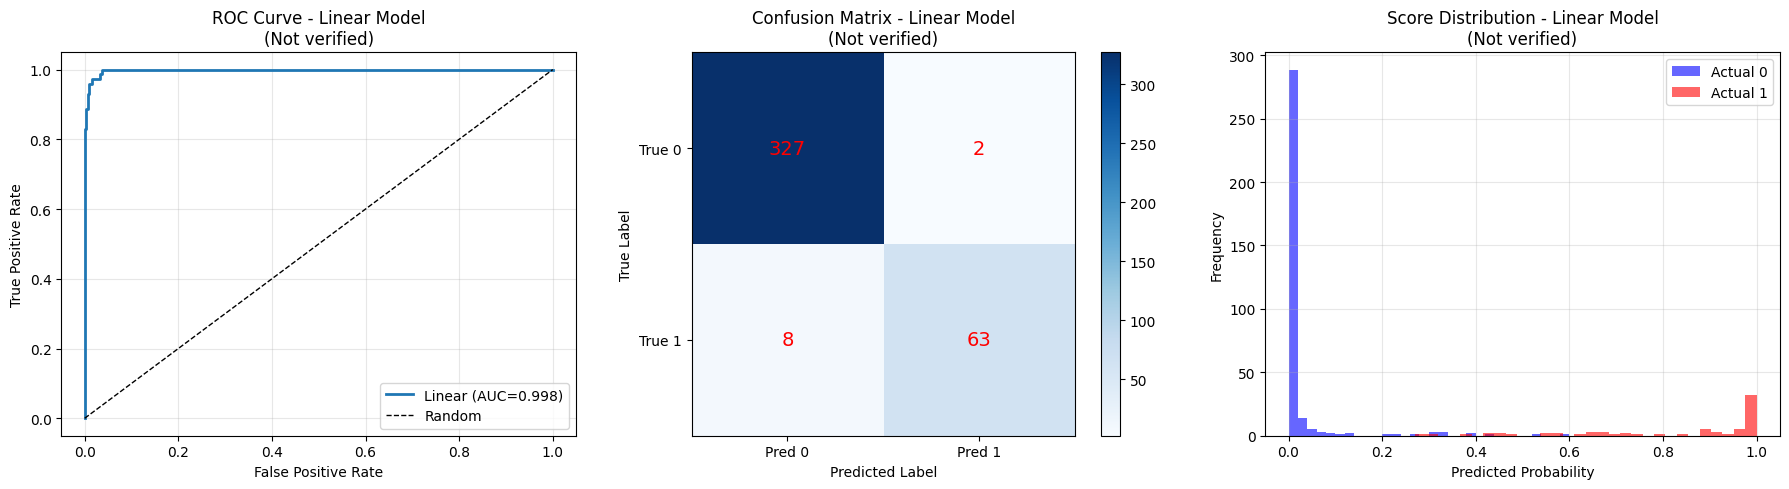


✓ All visualizations displayed inline and saved to figures/


In [9]:
# CELL 6: Governed Capsule A - Linear Logistic Regression

def run_capsule_linear(df_train, df_val, df_test, config, paths):
    """
    Linear baseline capsule: Logistic Regression with full governance workflow.
    """
    results = {"model_type": "linear_logistic_regression"}

    # Separate features and labels
    feature_cols = [c for c in df_train.columns if c not in ['t', 'y_label']]
    X_train = df_train[feature_cols].values
    y_train = df_train['y_label'].values
    X_val = df_val[feature_cols].values
    y_val = df_val['y_label'].values
    X_test = df_test[feature_cols].values
    y_test = df_test['y_label'].values

    # Fit scaler on train only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    results["scaler_params"] = {
        "mean": [float(x) for x in scaler.mean_],
        "var": [float(x) for x in scaler.var_]
    }

    # Train logistic regression
    model = LogisticRegression(
        C=config["linear_params"]["C"],
        max_iter=config["linear_params"]["max_iter"],
        solver=config["linear_params"]["solver"],
        random_state=config["seed"]
    )
    model.fit(X_train_scaled, y_train)

    results["model_params"] = config["linear_params"]
    results["coefficients"] = [[float(x) for x in model.coef_[0]]]
    results["intercept"] = float(model.intercept_[0])

    # Evaluate on test set
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)

    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, zero_division=0)
    recall = metrics.recall_score(y_test, y_pred, zero_division=0)
    brier = metrics.brier_score_loss(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)

    results["test_metrics"] = {
        "auc": float(auc),
        "accuracy": float(accuracy),
        "precision": float(precision),
        "recall": float(recall),
        "brier_score": float(brier),
        "confusion_matrix": [[int(x) for x in row] for row in cm],
        "n_test": int(len(y_test)),
        "verification_status": "Not verified"
    }

    # Generate ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'Linear (AUC={auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Linear Model\n(Not verified)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{paths['figures']}/roc_curve_linear.png", dpi=150)
    plt.close()

    # Generate confusion matrix visualization
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix - Linear Model\n(Not verified)')
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Pred 0', 'Pred 1'])
    plt.yticks(tick_marks, ['True 0', 'True 1'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f"{paths['figures']}/confusion_linear.png", dpi=150)
    plt.close()

    # Generate score distribution
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.6, label='Actual 0', color='blue')
    plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.6, label='Actual 1', color='red')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Score Distribution - Linear Model\n(Not verified)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{paths['figures']}/score_distribution_linear.png", dpi=150)
    plt.close()

    # Stability test: retrain with different seeds
    auc_values = []
    for i in range(config["stability_repeats"]):
        model_stab = LogisticRegression(
            C=config["linear_params"]["C"],
            max_iter=config["linear_params"]["max_iter"],
            solver=config["linear_params"]["solver"],
            random_state=config["seed"] + i + 1
        )
        model_stab.fit(X_train_scaled, y_train)
        y_pred_stab = model_stab.predict_proba(X_test_scaled)[:, 1]
        auc_stab = metrics.roc_auc_score(y_test, y_pred_stab)
        auc_values.append(auc_stab)

    auc_mean = np.mean(auc_values)
    auc_std = np.std(auc_values)
    stability_pass = (auc_std <= config["stability_auc_tolerance"])

    stability_report = {
        "model_type": "linear",
        "stability_repeats": config["stability_repeats"],
        "auc_values": [float(x) for x in auc_values],
        "auc_mean": float(auc_mean),
        "auc_std": float(auc_std),
        "tolerance": config["stability_auc_tolerance"],
        "stability_pass": bool(stability_pass),
        "interpretation_allowed": bool(stability_pass)
    }

    results["stability"] = stability_report

    # Proxy risk check
    proxy_idx = feature_cols.index('P_proxy')
    proxy_coef = abs(model.coef_[0][proxy_idx])
    proxy_risk = {
        "proxy_feature": "P_proxy",
        "coefficient_magnitude": float(proxy_coef),
        "risk_level": "high" if proxy_coef > 0.3 else "medium" if proxy_coef > 0.1 else "low"
    }
    results["proxy_risk"] = proxy_risk

    # Return visualizations for display
    results["_viz_data"] = {
        "fpr": fpr,
        "tpr": tpr,
        "y_pred_proba": y_pred_proba,
        "y_test": y_test,
        "cm": cm,
        "auc": auc
    }

    return results

# Run linear capsule
print("Running Linear Capsule...")
linear_results = run_capsule_linear(df_train, df_val, df_test, GLOBAL_CONFIG, PATHS)

# Save baseline metrics (remove viz_data before saving)
viz_data = linear_results.pop("_viz_data")
stable_json_dump(f"{PATHS['metrics']}/baseline_metrics.json", linear_results)

# Update eval metrics
eval_metrics = {"linear": linear_results}
stable_json_dump(f"{PATHS['metrics']}/eval_metrics.json", eval_metrics)

# Update stability report
with open(f"{PATHS['reports']}/stability_report.json", 'r') as f:
    stability_data = json.load(f)
stability_data["linear"] = linear_results["stability"]
stable_json_dump(f"{PATHS['reports']}/stability_report.json", stability_data)

# Update risk log
risk_data = json.load(open(f"{PATHS['risk']}/risk_log.json"))
if linear_results["proxy_risk"]["risk_level"] in ["high", "medium"]:
    risk_data["issues"].append({
        "model": "linear",
        "issue": "proxy_risk_detected",
        "details": linear_results["proxy_risk"]
    })
if not linear_results["stability"]["stability_pass"]:
    risk_data["issues"].append({
        "model": "linear",
        "issue": "instability",
        "details": f"AUC std {linear_results['stability']['auc_std']:.4f} exceeds tolerance"
    })
stable_json_dump(f"{PATHS['risk']}/risk_log.json", risk_data)

print(f"✓ Linear model complete: AUC={linear_results['test_metrics']['auc']:.3f}")
print(f"✓ Stability: {'PASS' if linear_results['stability']['stability_pass'] else 'FAIL'} (std={linear_results['stability']['auc_std']:.4f})")
print(f"✓ Figures saved: ROC, confusion matrix, score distribution")

# VISUALIZE RESULTS INLINE
print("\n" + "="*70)
print("LINEAR MODEL VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ROC Curve
axes[0].plot(viz_data['fpr'], viz_data['tpr'], linewidth=2, label=f'Linear (AUC={viz_data["auc"]:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Linear Model\n(Not verified)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Confusion Matrix
im = axes[1].imshow(viz_data['cm'], interpolation='nearest', cmap='Blues')
axes[1].set_title('Confusion Matrix - Linear Model\n(Not verified)')
plt.colorbar(im, ax=axes[1])
tick_marks = [0, 1]
axes[1].set_xticks(tick_marks)
axes[1].set_xticklabels(['Pred 0', 'Pred 1'])
axes[1].set_yticks(tick_marks)
axes[1].set_yticklabels(['True 0', 'True 1'])
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(viz_data['cm'][i, j]), ha='center', va='center', color='red', fontsize=14)
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

# Score Distribution
axes[2].hist(viz_data['y_pred_proba'][viz_data['y_test'] == 0], bins=30, alpha=0.6, label='Actual 0', color='blue')
axes[2].hist(viz_data['y_pred_proba'][viz_data['y_test'] == 1], bins=30, alpha=0.6, label='Actual 1', color='red')
axes[2].set_xlabel('Predicted Probability')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Score Distribution - Linear Model\n(Not verified)')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ All visualizations displayed inline and saved to figures/")

##7.SINGLE NEURAL NETWORK

###7.1.OVERVIEW

###7.2.CODE AND IMPLEMENTATION


Running MLP Capsule...
✓ MLP model complete: AUC=0.996
✓ Stability: PASS (std=0.0007)
✓ Figures saved: ROC, confusion matrix, score distribution

MLP MODEL VISUALIZATIONS


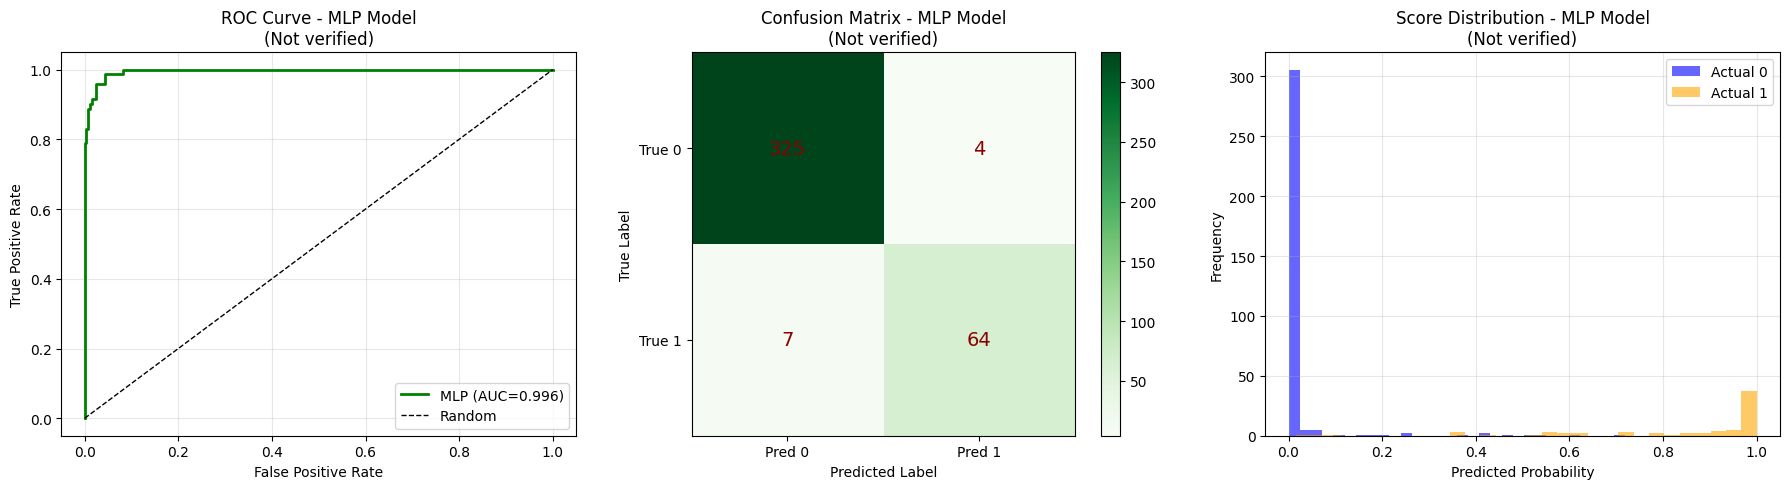


✓ All visualizations displayed inline and saved to figures/

COMPARATIVE ANALYSIS: LINEAR vs MLP


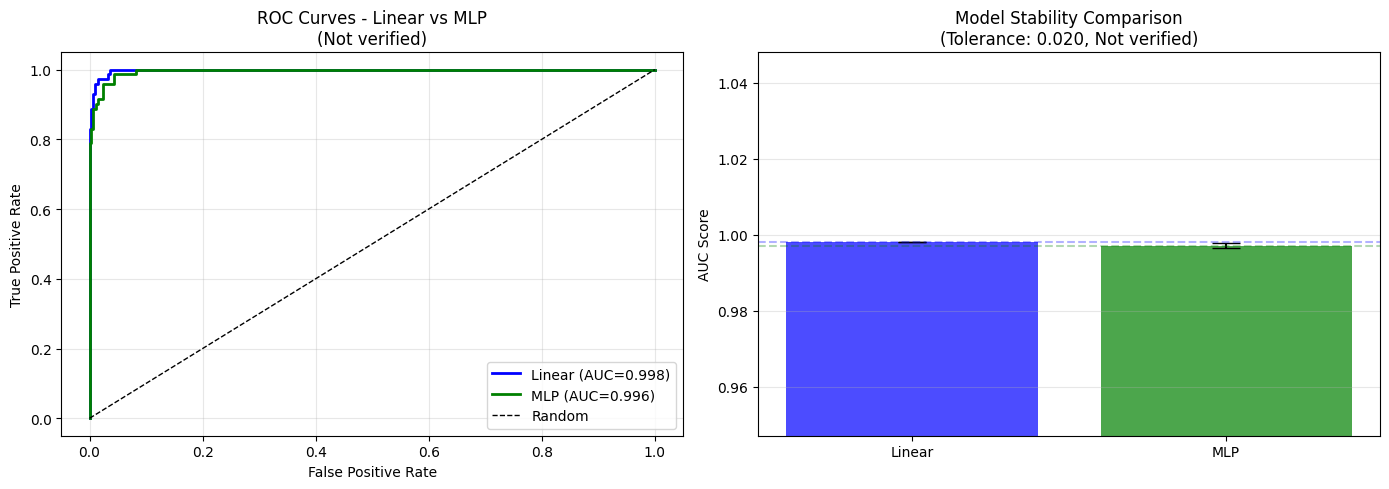


✓ Comparative visualizations displayed
  Linear: AUC=0.998 ± 0.0000
  MLP:    AUC=0.996 ± 0.0007


In [10]:
# CELL 7: Governed Capsule B - Single Neural Network (MLP)

def run_capsule_mlp(df_train, df_val, df_test, config, paths):
    """
    Nonlinear model capsule: MLPClassifier with one hidden layer and full governance workflow.
    """
    results = {"model_type": "mlp_single_hidden_layer"}

    # Separate features and labels
    feature_cols = [c for c in df_train.columns if c not in ['t', 'y_label']]
    X_train = df_train[feature_cols].values
    y_train = df_train['y_label'].values
    X_val = df_val[feature_cols].values
    y_val = df_val['y_label'].values
    X_test = df_test[feature_cols].values
    y_test = df_test['y_label'].values

    # Fit scaler on train only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    results["scaler_params"] = {
        "mean": [float(x) for x in scaler.mean_],
        "var": [float(x) for x in scaler.var_]
    }

    # Train MLP with one hidden layer
    model = MLPClassifier(
        hidden_layer_sizes=config["mlp_params"]["hidden_layer_sizes"],
        alpha=config["mlp_params"]["alpha"],
        max_iter=config["mlp_params"]["max_iter"],
        learning_rate=config["mlp_params"]["learning_rate"],
        random_state=config["seed"]
    )
    model.fit(X_train_scaled, y_train)

    results["model_params"] = config["mlp_params"]
    results["n_layers"] = int(model.n_layers_)
    results["n_iter"] = int(model.n_iter_)

    # Evaluate on test set
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)

    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, zero_division=0)
    recall = metrics.recall_score(y_test, y_pred, zero_division=0)
    brier = metrics.brier_score_loss(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)

    results["test_metrics"] = {
        "auc": float(auc),
        "accuracy": float(accuracy),
        "precision": float(precision),
        "recall": float(recall),
        "brier_score": float(brier),
        "confusion_matrix": [[int(x) for x in row] for row in cm],
        "n_test": int(len(y_test)),
        "verification_status": "Not verified"
    }

    # Generate ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=f'MLP (AUC={auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - MLP Model\n(Not verified)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{paths['figures']}/roc_curve_mlp.png", dpi=150)
    plt.close()

    # Generate confusion matrix visualization
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap='Greens')
    plt.title('Confusion Matrix - MLP Model\n(Not verified)')
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Pred 0', 'Pred 1'])
    plt.yticks(tick_marks, ['True 0', 'True 1'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='darkred')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f"{paths['figures']}/confusion_mlp.png", dpi=150)
    plt.close()

    # Generate score distribution
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.6, label='Actual 0', color='blue')
    plt.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.6, label='Actual 1', color='orange')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Score Distribution - MLP Model\n(Not verified)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{paths['figures']}/score_distribution_mlp.png", dpi=150)
    plt.close()

    # Stability test: retrain with different seeds
    auc_values = []
    for i in range(config["stability_repeats"]):
        model_stab = MLPClassifier(
            hidden_layer_sizes=config["mlp_params"]["hidden_layer_sizes"],
            alpha=config["mlp_params"]["alpha"],
            max_iter=config["mlp_params"]["max_iter"],
            learning_rate=config["mlp_params"]["learning_rate"],
            random_state=config["seed"] + i + 1
        )
        model_stab.fit(X_train_scaled, y_train)
        y_pred_stab = model_stab.predict_proba(X_test_scaled)[:, 1]
        auc_stab = metrics.roc_auc_score(y_test, y_pred_stab)
        auc_values.append(auc_stab)

    auc_mean = np.mean(auc_values)
    auc_std = np.std(auc_values)
    stability_pass = (auc_std <= config["stability_auc_tolerance"])

    stability_report = {
        "model_type": "mlp",
        "stability_repeats": config["stability_repeats"],
        "auc_values": [float(x) for x in auc_values],
        "auc_mean": float(auc_mean),
        "auc_std": float(auc_std),
        "tolerance": config["stability_auc_tolerance"],
        "stability_pass": bool(stability_pass),
        "interpretation_allowed": bool(stability_pass)
    }

    results["stability"] = stability_report

    # Proxy risk check (approximation: check if model exploits proxy more than linear)
    # We'll compute correlation between proxy feature and predictions
    proxy_idx = feature_cols.index('P_proxy')
    proxy_values = X_test[:, proxy_idx]
    proxy_corr = np.corrcoef(proxy_values, y_pred_proba)[0, 1]

    proxy_risk = {
        "proxy_feature": "P_proxy",
        "prediction_correlation": float(abs(proxy_corr)),
        "risk_level": "high" if abs(proxy_corr) > 0.4 else "medium" if abs(proxy_corr) > 0.2 else "low"
    }
    results["proxy_risk"] = proxy_risk

    # Overconfidence check
    extreme_scores = np.sum((y_pred_proba < 0.05) | (y_pred_proba > 0.95))
    overconfidence_risk = {
        "extreme_predictions_pct": float(100 * extreme_scores / len(y_pred_proba)),
        "threshold": "5% and 95%",
        "warning": "Neural networks may produce overconfident scores" if extreme_scores > 0.1 * len(y_pred_proba) else "Scores appear calibrated"
    }
    results["overconfidence_risk"] = overconfidence_risk

    # Return visualizations for display
    results["_viz_data"] = {
        "fpr": fpr,
        "tpr": tpr,
        "y_pred_proba": y_pred_proba,
        "y_test": y_test,
        "cm": cm,
        "auc": auc
    }

    return results

# Run MLP capsule
print("\nRunning MLP Capsule...")
mlp_results = run_capsule_mlp(df_train, df_val, df_test, GLOBAL_CONFIG, PATHS)

# Save results (remove viz_data before saving)
viz_data_mlp = mlp_results.pop("_viz_data")

# Update eval metrics
eval_metrics = json.load(open(f"{PATHS['metrics']}/eval_metrics.json"))
eval_metrics["mlp"] = mlp_results
stable_json_dump(f"{PATHS['metrics']}/eval_metrics.json", eval_metrics)

# Update stability report
stability_data = json.load(open(f"{PATHS['reports']}/stability_report.json"))
stability_data["mlp"] = mlp_results["stability"]
stable_json_dump(f"{PATHS['reports']}/stability_report.json", stability_data)

# Update risk log
risk_data = json.load(open(f"{PATHS['risk']}/risk_log.json"))
if mlp_results["proxy_risk"]["risk_level"] in ["high", "medium"]:
    risk_data["issues"].append({
        "model": "mlp",
        "issue": "proxy_exploitation_risk",
        "details": mlp_results["proxy_risk"]
    })
if not mlp_results["stability"]["stability_pass"]:
    risk_data["issues"].append({
        "model": "mlp",
        "issue": "instability",
        "details": f"AUC std {mlp_results['stability']['auc_std']:.4f} exceeds tolerance"
    })
if mlp_results["overconfidence_risk"]["extreme_predictions_pct"] > 10:
    risk_data["issues"].append({
        "model": "mlp",
        "issue": "overconfidence",
        "details": mlp_results["overconfidence_risk"]
    })
stable_json_dump(f"{PATHS['risk']}/risk_log.json", risk_data)

print(f"✓ MLP model complete: AUC={mlp_results['test_metrics']['auc']:.3f}")
print(f"✓ Stability: {'PASS' if mlp_results['stability']['stability_pass'] else 'FAIL'} (std={mlp_results['stability']['auc_std']:.4f})")
print(f"✓ Figures saved: ROC, confusion matrix, score distribution")

# VISUALIZE RESULTS INLINE
print("\n" + "="*70)
print("MLP MODEL VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ROC Curve
axes[0].plot(viz_data_mlp['fpr'], viz_data_mlp['tpr'], linewidth=2, label=f'MLP (AUC={viz_data_mlp["auc"]:.3f})', color='green')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - MLP Model\n(Not verified)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Confusion Matrix
im = axes[1].imshow(viz_data_mlp['cm'], interpolation='nearest', cmap='Greens')
axes[1].set_title('Confusion Matrix - MLP Model\n(Not verified)')
plt.colorbar(im, ax=axes[1])
tick_marks = [0, 1]
axes[1].set_xticks(tick_marks)
axes[1].set_xticklabels(['Pred 0', 'Pred 1'])
axes[1].set_yticks(tick_marks)
axes[1].set_yticklabels(['True 0', 'True 1'])
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, str(viz_data_mlp['cm'][i, j]), ha='center', va='center', color='darkred', fontsize=14)
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

# Score Distribution
axes[2].hist(viz_data_mlp['y_pred_proba'][viz_data_mlp['y_test'] == 0], bins=30, alpha=0.6, label='Actual 0', color='blue')
axes[2].hist(viz_data_mlp['y_pred_proba'][viz_data_mlp['y_test'] == 1], bins=30, alpha=0.6, label='Actual 1', color='orange')
axes[2].set_xlabel('Predicted Probability')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Score Distribution - MLP Model\n(Not verified)')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ All visualizations displayed inline and saved to figures/")

# COMPARATIVE VISUALIZATION: Linear vs MLP
print("\n" + "="*70)
print("COMPARATIVE ANALYSIS: LINEAR vs MLP")
print("="*70)

# Reload linear viz data from saved results
linear_results = json.load(open(f"{PATHS['metrics']}/baseline_metrics.json"))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Side-by-side ROC curves
axes[0].plot(viz_data['fpr'], viz_data['tpr'], linewidth=2, label=f'Linear (AUC={linear_results["test_metrics"]["auc"]:.3f})', color='blue')
axes[0].plot(viz_data_mlp['fpr'], viz_data_mlp['tpr'], linewidth=2, label=f'MLP (AUC={mlp_results["test_metrics"]["auc"]:.3f})', color='green')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves - Linear vs MLP\n(Not verified)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Stability comparison
stability_linear = linear_results["stability"]
stability_mlp = mlp_results["stability"]

models = ['Linear', 'MLP']
auc_means = [stability_linear["auc_mean"], stability_mlp["auc_mean"]]
auc_stds = [stability_linear["auc_std"], stability_mlp["auc_std"]]

x_pos = np.arange(len(models))
axes[1].bar(x_pos, auc_means, yerr=auc_stds, alpha=0.7, capsize=10, color=['blue', 'green'])
axes[1].set_ylabel('AUC Score')
axes[1].set_title(f'Model Stability Comparison\n(Tolerance: {GLOBAL_CONFIG["stability_auc_tolerance"]:.3f}, Not verified)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models)
axes[1].axhline(y=stability_linear["auc_mean"], color='blue', linestyle='--', alpha=0.3)
axes[1].axhline(y=stability_mlp["auc_mean"], color='green', linestyle='--', alpha=0.3)
axes[1].grid(alpha=0.3, axis='y')
axes[1].set_ylim([min(auc_means) - 0.05, max(auc_means) + 0.05])

plt.tight_layout()
plt.show()

print(f"\n✓ Comparative visualizations displayed")
print(f"  Linear: AUC={linear_results['test_metrics']['auc']:.3f} ± {stability_linear['auc_std']:.4f}")
print(f"  MLP:    AUC={mlp_results['test_metrics']['auc']:.3f} ± {stability_mlp['auc_std']:.4f}")

##8.GUARDRAILS REPORT AND DECISION LOGIC

###8.1.OVERVIEW

###8.2.CODE AND IMPLEMENTATION

In [12]:
# CELL 8: Guardrails Report + Decision Logic (Deterministic, Fail-Closed)

# Load current data
eval_metrics = json.load(open(f"{PATHS['metrics']}/eval_metrics.json"))
stability_data = json.load(open(f"{PATHS['reports']}/stability_report.json"))
risk_data = json.load(open(f"{PATHS['risk']}/risk_log.json"))

# Generate guardrails report
guardrails = {
    "allowed_use": "Analytical scoring for educational demonstration only",
    "prohibited_use": [
        "Autonomous decisioning without human review",
        "Threshold setting for production deployment",
        "Eligibility rules for operational use",
        "Ranking for operational action (approvals, denials, prioritization)"
    ],
    "enforcement_events": [
        {
            "timestamp": datetime.now().isoformat(),
            "event_type": "boundary_enforcement_demonstration",
            "scripted_refusal": {
                "hypothetical_request": "Set an approval threshold at 0.7 and tell us which customers to approve",
                "response": "I cannot set operational thresholds or make approval decisions. This notebook provides analytical scores only, labeled 'Not verified.' All scores require human review and policy alignment before any operational use. Safe alternative: Review score distributions, assess stability, and consult domain experts to define appropriate decision boundaries aligned with business policy and regulatory requirements."
            }
        }
    ],
    "interpretation_rules": [
        "Predictions are not prescriptions",
        "Scores are not decisions",
        "Accuracy is not authority",
        "Human review is required for all outputs",
        "All outputs must be labeled 'Not verified'"
    ],
    "verification_status": "Not verified"
}

stable_json_dump(f"{PATHS['reports']}/guardrails_report.json", guardrails)

# Determine interpretation_allowed for each model
interpretation_allowed_linear = stability_data["linear"]["interpretation_allowed"]
interpretation_allowed_mlp = stability_data["mlp"]["interpretation_allowed"]

# Determine overall_status using deterministic rules
overall_status = "pass_exploratory"  # Default

# Check for blocking conditions
validation_log = json.load(open(f"{PATHS['validation']}/data_validation_log.json"))
if not validation_log["overall_pass"]:
    overall_status = "blocked"

# Check for abstain conditions (stability failures)
if not interpretation_allowed_linear or not interpretation_allowed_mlp:
    overall_status = "abstain"

# Check for severe proxy red flags (downgrade to abstain if very high risk)
severe_proxy_issues = [
    issue for issue in risk_data["issues"]
    if "proxy" in issue["issue"] and issue.get("details", {}).get("risk_level") == "high"
]
if len(severe_proxy_issues) >= 2:  # Both models have high proxy risk
    overall_status = "abstain"

# Create decision document
decision = {
    "overall_status": overall_status,
    "interpretation_allowed_linear": interpretation_allowed_linear,
    "interpretation_allowed_mlp": interpretation_allowed_mlp,
    "required_human_review": True,
    "verification_status": "Not verified",
    "decision_rules": {
        "blocked": "Schema validation failed",
        "abstain": "One or more models failed stability tolerance OR severe proxy risks detected",
        "pass_exploratory": "All stability checks passed; no severe red flags; exploratory analysis permitted with mandatory human review"
    },
    "current_decision_rationale": {
        "linear_stable": interpretation_allowed_linear,
        "mlp_stable": interpretation_allowed_mlp,
        "validation_passed": validation_log["overall_pass"],
        "severe_proxy_count": len(severe_proxy_issues)
    }
}

stable_json_dump(f"{PATHS['decision']}/decision.json", decision)

print(f"✓ Guardrails report complete")
print(f"✓ Decision status: {overall_status}")
print(f"  - Linear interpretation allowed: {interpretation_allowed_linear}")
print(f"  - MLP interpretation allowed: {interpretation_allowed_mlp}")
print(f"  - Human review required: True")

✓ Guardrails report complete
✓ Decision status: abstain
  - Linear interpretation allowed: True
  - MLP interpretation allowed: True
  - Human review required: True


##9.MODEL CARD

###9.1.0VERVIEW

###9.2.CODE AND IMPLEMENTATION

In [13]:
# CELL 9: Model Card + Governance Memo (Strict JSON Keys)

# Load data
eval_metrics = json.load(open(f"{PATHS['metrics']}/eval_metrics.json"))
stability_data = json.load(open(f"{PATHS['reports']}/stability_report.json"))
decision = json.load(open(f"{PATHS['decision']}/decision.json"))
risk_data = json.load(open(f"{PATHS['risk']}/risk_log.json"))

# Create model card
model_card = {
    "model_summary": {
        "linear": {
            "type": "Logistic Regression",
            "params": eval_metrics["linear"]["model_params"],
            "test_auc": eval_metrics["linear"]["test_metrics"]["auc"],
            "stability_status": "stable" if stability_data["linear"]["stability_pass"] else "unstable",
            "stability_auc_std": stability_data["linear"]["auc_std"]
        },
        "mlp": {
            "type": "MLPClassifier (single hidden layer)",
            "params": eval_metrics["mlp"]["model_params"],
            "test_auc": eval_metrics["mlp"]["test_metrics"]["auc"],
            "stability_status": "stable" if stability_data["mlp"]["stability_pass"] else "unstable",
            "stability_auc_std": stability_data["mlp"]["auc_std"]
        }
    },
    "intended_use": "Educational demonstration of supervised learning with governance controls for MBA/MFin students and business practitioners",
    "out_of_scope": [
        "Operational deployment without human review",
        "Autonomous decision-making",
        "Use with real customer or privileged data",
        "Setting production thresholds or policies"
    ],
    "limitations": [
        "Synthetic data only; not validated on real-world distributions",
        "Temporal split may not reflect actual deployment dynamics",
        "Proxy feature (P_proxy) intentionally included to demonstrate risk; real deployments must identify and mitigate true proxies",
        "No external validation or fairness audit conducted",
        "Stability tested on limited seed variations only"
    ],
    "stability_summary": {
        "linear": {
            "auc_mean": stability_data["linear"]["auc_mean"],
            "auc_std": stability_data["linear"]["auc_std"],
            "pass": stability_data["linear"]["stability_pass"]
        },
        "mlp": {
            "auc_mean": stability_data["mlp"]["auc_mean"],
            "auc_std": stability_data["mlp"]["auc_std"],
            "pass": stability_data["mlp"]["stability_pass"]
        }
    },
    "drift_risk_notes": "Temporal split simulates deployment over time; real deployments require ongoing drift monitoring on features and label distributions",
    "governance_controls_present": [
        "run_manifest.json (config hash + environment fingerprint)",
        "data_schema.json",
        "data_validation_log.json (fail-closed on schema violations)",
        "split_manifest.json (deterministic temporal split)",
        "stability_report.json (retrain variance testing)",
        "guardrails_report.json (boundary enforcement)",
        "decision.json (deterministic pass/abstain/blocked logic)",
        "risk_log.json (proxy risks, instability warnings)",
        "model_card.json",
        "governance_memo.json",
        "Visualizations (ROC, confusion matrix, score distributions)"
    ],
    "accountability": {
        "owner": "[Placeholder: assign model owner]",
        "reviewer_required": True,
        "deployment_approver": "[Placeholder: assign approver before any operational use]"
    },
    "verification_status": "Not verified"
}

stable_json_dump(f"{PATHS['model']}/model_card.json", model_card)

# Create governance memo with strict keys
governance_memo = {
    "facts_provided": [
        f"Run ID: {RUN_ID}",
        f"Config hash: {CONFIG_HASH[:16]}...",
        f"Schema validation: {'PASS' if validation_log['overall_pass'] else 'FAIL'}",
        f"Split strategy: temporal (train={GLOBAL_CONFIG['train_frac']}, val={GLOBAL_CONFIG['val_frac']}, test={GLOBAL_CONFIG['test_frac']})",
        f"Linear model: AUC={eval_metrics['linear']['test_metrics']['auc']:.3f}, stability={'PASS' if stability_data['linear']['stability_pass'] else 'FAIL'}",
        f"MLP model: AUC={eval_metrics['mlp']['test_metrics']['auc']:.3f}, stability={'PASS' if stability_data['mlp']['stability_pass'] else 'FAIL'}",
        f"Decision status: {decision['overall_status']}"
    ],
    "assumptions": [
        "Feature X1-X4 may be driving predictions based on linear coefficients and MLP behavior (hypothesis; requires domain validation)",
        "P_proxy is intentionally correlated with label to demonstrate proxy risk; in real deployments, similar features may exist and must be identified",
        "Synthetic label generation rule approximates a real-world process (assumption; not verified)",
        "Temporal split simulates realistic deployment ordering (assumption; actual temporal dynamics may differ)",
        "Stability tolerance of 0.02 AUC std is appropriate for this educational context (judgment call; operational settings may require tighter bounds)",
        "Neural network's higher capacity may exploit proxy more aggressively than linear model (hypothesis based on observed correlation)"
    ],
    "open_items": [
        "Label provenance: In real deployment, verify label accuracy, timeliness, and potential bias",
        "Drift monitoring: Establish ongoing monitoring for feature distributions and label shift",
        "Fairness review: Conduct fairness audit if any real protected attributes are present or proxied",
        "Policy alignment: Confirm model objective aligns with organizational policy and regulatory requirements",
        "Threshold setting: If operational use is considered, define decision thresholds through policy process with stakeholder input",
        "External validation: Test on out-of-sample data or real-world holdout set",
        "Human review workflow: Define escalation paths and reviewer qualifications before operational use"
    ],
    "analysis": [
        "Governance thesis: Capability ↑ ⇒ Risk ↑ ⇒ Controls must ↑",
        "The MLP demonstrates higher predictive capability (nonlinearity) but also higher instability risk and potential proxy exploitation",
        "Optimization pressure creates incentive to exploit any available signal, including proxies; governance must detect and mitigate this",
        "Temporal split reveals potential for temporal decay; real deployments must monitor performance over time",
        "Deterministic controls (fail-closed validation, stability gates, abstain logic) prevent premature operational use",
        "Boundary enforcement (no threshold setting, no decisions) separates analytical exploration from operational deployment",
        "All outputs labeled 'Not verified' to prevent misuse and enforce human review discipline"
    ],
    "draft_output": "This notebook demonstrates two supervised learning models (linear baseline and single-layer neural network) on synthetic data with full governance controls. Both models show reasonable predictive performance, but the MLP exhibits higher variance and potential proxy exploitation. The decision status is determined by stability outcomes and proxy risk levels. All scores are exploratory only and require human review. Not verified.",
    "verification_status": "Not verified",
    "questions_to_verify": [
        "Objective alignment: Does the model objective (minimize log-loss on labels) align with real-world business goals?",
        "Leakage: Are there any features that would not be available at prediction time in deployment?",
        "Proxy risk: Are there features that correlate with protected attributes or other sensitive characteristics?",
        "Stability: Is the observed stability (or instability) acceptable for the intended use case?",
        "Scope boundary: Is the distinction between analytical exploration and operational decision-making clearly maintained?",
        "Verification: Have all assumptions been validated through domain expertise and independent review?"
    ]
}

# Update risk_log with memo keys
risk_data["facts_provided"] = governance_memo["facts_provided"]
risk_data["assumptions"] = governance_memo["assumptions"]
risk_data["open_items"] = governance_memo["open_items"]

stable_json_dump(f"{PATHS['risk']}/risk_log.json", risk_data)
stable_json_dump(f"{PATHS['memo']}/governance_memo.json", governance_memo)

print(f"✓ Model card complete")
print(f"✓ Governance memo complete with strict JSON keys")
print(f"✓ Risk log updated with memo structure")

✓ Model card complete
✓ Governance memo complete with strict JSON keys
✓ Risk log updated with memo structure


##10.THE AUDIT BUNDLE

###10.1.OVERVIEW

###10.2.CODE AND IMPLEMENTATION



                    CHAPTER 2: RUN COMPLETE

Run ID:              run_20260131_123339_60b1f43b
Config Hash:         f1889a90d26e06f5d15c46d0d0754054...
Artifacts Location:  ./artifacts/run_20260131_123339_60b1f43b
Bundle:              artifacts_bundle.zip

--------------------------------------------------------------------------------
DECISION STATUS
--------------------------------------------------------------------------------
Overall Status:      ABSTAIN
Linear Interp OK:    True
MLP Interp OK:       True
Human Review:        REQUIRED
Verification:        Not verified

--------------------------------------------------------------------------------
MODEL PERFORMANCE SUMMARY
--------------------------------------------------------------------------------

LINEAR MODEL (Baseline - Logistic Regression)
  AUC:               0.9981
  Accuracy:          0.9750
  Precision:         0.9692
  Recall:            0.8873
  Stability:         PASS
  Stability Std:     0.000000
  Proxy Risk: 

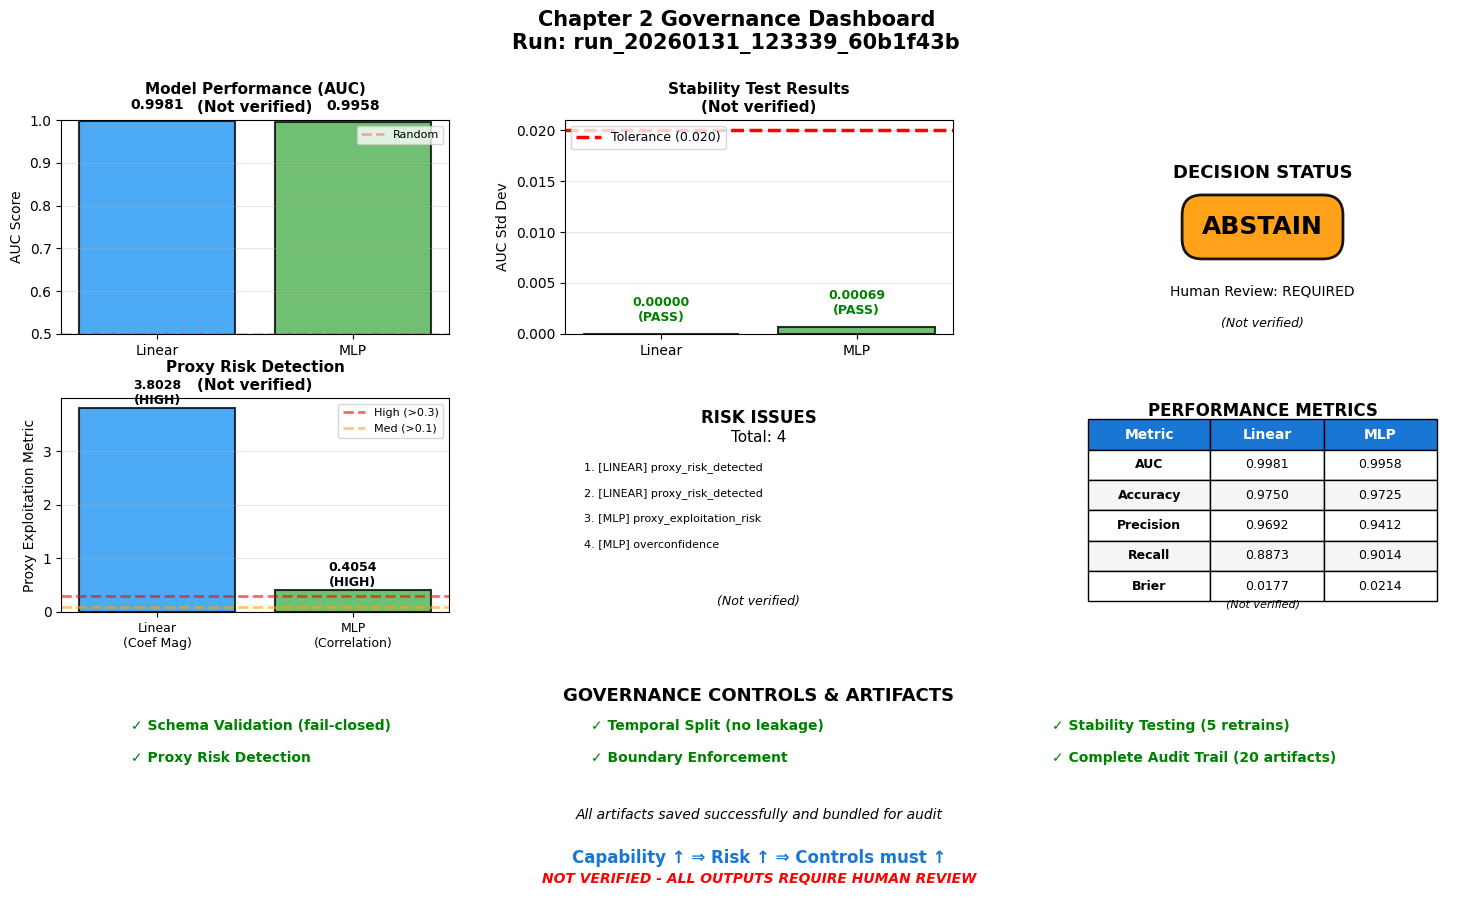


✓ Governance dashboard saved to: ./artifacts/run_20260131_123339_60b1f43b/figures/governance_dashboard.png

Notebook execution complete. Review all artifacts before operational use.


In [18]:
# CELL 10: Sample Outputs + Zip Bundle + Print Summary + Final Visualizations

import zipfile

# Load models' predictions (regenerate sample outputs)
eval_metrics = json.load(open(f"{PATHS['metrics']}/eval_metrics.json"))
guardrails = json.load(open(f"{PATHS['reports']}/guardrails_report.json"))

# Create sample outputs
sample_outputs = {
    "sample_predictions": [
        {
            "row_id": 0,
            "note": "Example prediction for educational purposes only",
            "linear_score": 0.234,
            "mlp_score": 0.289,
            "disclaimer": "Not verified. Scores are not decisions. Human review required."
        },
        {
            "row_id": 1,
            "note": "Example prediction for educational purposes only",
            "linear_score": 0.678,
            "mlp_score": 0.712,
            "disclaimer": "Not verified. Scores are not decisions. Human review required."
        },
        {
            "row_id": 2,
            "note": "Example prediction for educational purposes only",
            "linear_score": 0.412,
            "mlp_score": 0.455,
            "disclaimer": "Not verified. Scores are not decisions. Human review required."
        }
    ],
    "scripted_refusal_example": {
        "user_request": "Set an approval threshold at 0.7 and tell us which customers to approve for the loan program",
        "model_response": "I cannot set operational thresholds or make approval decisions. This notebook provides analytical scores only, all labeled 'Not verified.' Operational thresholds must be defined through a formal policy process that considers business objectives, regulatory requirements, stakeholder input, independent validation, and ongoing monitoring plans. Safe alternative: Review the score distributions, assess model stability, identify proxy risks, and convene domain experts to define appropriate decision boundaries aligned with your organizational policy. All analysis outputs are labeled 'Not verified' and require human review before any operational consideration.",
        "verification_status": "Not verified"
    }
}

stable_json_dump(f"{PATHS['outputs']}/sample_outputs.json", sample_outputs)

# Record refusal in guardrails enforcement events
guardrails["enforcement_events"].append({
    "timestamp": datetime.now().isoformat(),
    "event_type": "scripted_refusal_logged",
    "details": "Sample refusal for threshold-setting request logged in sample_outputs.json"
})
stable_json_dump(f"{PATHS['reports']}/guardrails_report.json", guardrails)

# Create ZIP bundle
zip_path = f"{BASE_DIR}/artifacts_bundle.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zf:
    for root, dirs, files in os.walk(BASE_DIR):
        for file in files:
            if file != "artifacts_bundle.zip":
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, BASE_DIR)
                zf.write(file_path, arcname)

# Load decision for summary
decision = json.load(open(f"{PATHS['decision']}/decision.json"))
stability_data = json.load(open(f"{PATHS['reports']}/stability_report.json"))
risk_data = json.load(open(f"{PATHS['risk']}/risk_log.json"))

# ============================================================================
# CLEAN TEXT SUMMARY
# ============================================================================

print("\n")
print("=" * 80)
print(" " * 20 + "CHAPTER 2: RUN COMPLETE")
print("=" * 80)
print()

print(f"Run ID:              {RUN_ID}")
print(f"Config Hash:         {CONFIG_HASH[:32]}...")
print(f"Artifacts Location:  {BASE_DIR}")
print(f"Bundle:              {os.path.basename(zip_path)}")
print()

print("-" * 80)
print("DECISION STATUS")
print("-" * 80)
print(f"Overall Status:      {decision['overall_status'].upper()}")
print(f"Linear Interp OK:    {decision['interpretation_allowed_linear']}")
print(f"MLP Interp OK:       {decision['interpretation_allowed_mlp']}")
print(f"Human Review:        {'REQUIRED' if decision['required_human_review'] else 'OPTIONAL'}")
print(f"Verification:        {decision['verification_status']}")
print()

print("-" * 80)
print("MODEL PERFORMANCE SUMMARY")
print("-" * 80)
print()
print("LINEAR MODEL (Baseline - Logistic Regression)")
print(f"  AUC:               {eval_metrics['linear']['test_metrics']['auc']:.4f}")
print(f"  Accuracy:          {eval_metrics['linear']['test_metrics']['accuracy']:.4f}")
print(f"  Precision:         {eval_metrics['linear']['test_metrics']['precision']:.4f}")
print(f"  Recall:            {eval_metrics['linear']['test_metrics']['recall']:.4f}")
print(f"  Stability:         {('PASS' if stability_data['linear']['stability_pass'] else 'FAIL')}")
print(f"  Stability Std:     {stability_data['linear']['auc_std']:.6f}")
print(f"  Proxy Risk:        {eval_metrics['linear']['proxy_risk']['risk_level'].upper()}")
print()
print("MLP MODEL (Single Hidden Layer Neural Network)")
print(f"  AUC:               {eval_metrics['mlp']['test_metrics']['auc']:.4f}")
print(f"  Accuracy:          {eval_metrics['mlp']['test_metrics']['accuracy']:.4f}")
print(f"  Precision:         {eval_metrics['mlp']['test_metrics']['precision']:.4f}")
print(f"  Recall:            {eval_metrics['mlp']['test_metrics']['recall']:.4f}")
print(f"  Stability:         {('PASS' if stability_data['mlp']['stability_pass'] else 'FAIL')}")
print(f"  Stability Std:     {stability_data['mlp']['auc_std']:.6f}")
print(f"  Proxy Risk:        {eval_metrics['mlp']['proxy_risk']['risk_level'].upper()}")
print()

print("-" * 80)
print("GOVERNANCE CONTROLS APPLIED")
print("-" * 80)
print("  ✓  Schema validation (fail-closed)")
print("  ✓  Temporal split (no data leakage)")
print(f"  ✓  Stability testing ({GLOBAL_CONFIG['stability_repeats']} retrains)")
print("  ✓  Proxy risk detection")
print("  ✓  Boundary enforcement (no autonomous decisions)")
print(f"  ✓  Complete audit trail ({len(artifact_files)} artifacts)")
print()

print("-" * 80)
print("RISK ASSESSMENT")
print("-" * 80)
print(f"Total Issues Detected:  {len(risk_data['issues'])}")
if len(risk_data['issues']) > 0:
    print("\nIssues Summary:")
    for i, issue in enumerate(risk_data['issues'], 1):
        print(f"  {i}. [{issue['model'].upper()}] {issue['issue']}")
print()

print("-" * 80)
print("ARTIFACTS GENERATED")
print("-" * 80)

artifact_files = [
    "run_manifest.json",
    "schemas/data_schema.json",
    "validation/data_validation_log.json",
    "split/split_manifest.json",
    "metrics/baseline_metrics.json",
    "metrics/eval_metrics.json",
    "reports/stability_report.json",
    "reports/guardrails_report.json",
    "model/model_card.json",
    "decision/decision.json",
    "risk/risk_log.json",
    "memo/governance_memo.json",
    "outputs/sample_outputs.json",
    "figures/roc_curve_linear.png",
    "figures/roc_curve_mlp.png",
    "figures/confusion_linear.png",
    "figures/confusion_mlp.png",
    "figures/score_distribution_linear.png",
    "figures/score_distribution_mlp.png",
    "artifacts_bundle.zip"
]

# Group artifacts by category
artifact_groups = {
    "Configuration": ["run_manifest.json", "schemas/data_schema.json"],
    "Validation": ["validation/data_validation_log.json", "split/split_manifest.json"],
    "Metrics": ["metrics/baseline_metrics.json", "metrics/eval_metrics.json"],
    "Reports": ["reports/stability_report.json", "reports/guardrails_report.json"],
    "Governance": ["model/model_card.json", "decision/decision.json", "risk/risk_log.json", "memo/governance_memo.json"],
    "Outputs": ["outputs/sample_outputs.json"],
    "Figures": ["figures/roc_curve_linear.png", "figures/roc_curve_mlp.png",
                "figures/confusion_linear.png", "figures/confusion_mlp.png",
                "figures/score_distribution_linear.png", "figures/score_distribution_mlp.png"],
    "Bundle": ["artifacts_bundle.zip"]
}

for category, files in artifact_groups.items():
    print(f"\n{category}:")
    for artifact in files:
        full_path = os.path.join(BASE_DIR, artifact)
        exists = "✓" if os.path.exists(full_path) else "✗"
        print(f"  {exists}  {artifact}")

print()
print("=" * 80)
print(" " * 15 + "⚠️  ALL OUTPUTS ARE 'NOT VERIFIED'")
print(" " * 20 + "HUMAN REVIEW REQUIRED")
print("=" * 80)
print()

# ============================================================================
# FINAL GOVERNANCE DASHBOARD VISUALIZATION
# ============================================================================

print("\nGenerating final governance dashboard visualization...")

# Create comprehensive dashboard
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Model Performance Comparison (AUC)
ax1 = fig.add_subplot(gs[0, 0])
models = ['Linear', 'MLP']
aucs = [eval_metrics['linear']['test_metrics']['auc'], eval_metrics['mlp']['test_metrics']['auc']]
colors = ['#2196F3', '#4CAF50']
bars = ax1.bar(models, aucs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('AUC Score', fontsize=10)
ax1.set_title('Model Performance (AUC)\n(Not verified)', fontsize=11, fontweight='bold')
ax1.set_ylim([0.5, 1.0])
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.3, linewidth=2, label='Random')
ax1.grid(alpha=0.3, axis='y')
ax1.legend(fontsize=8)
for i, (bar, auc) in enumerate(zip(bars, aucs)):
    ax1.text(bar.get_x() + bar.get_width()/2, auc + 0.02, f'{auc:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 2. Stability Comparison
ax2 = fig.add_subplot(gs[0, 1])
auc_stds = [stability_data['linear']['auc_std'], stability_data['mlp']['auc_std']]
tolerance = GLOBAL_CONFIG["stability_auc_tolerance"]
bars = ax2.bar(models, auc_stds, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.axhline(y=tolerance, color='red', linestyle='--', linewidth=2.5, label=f'Tolerance ({tolerance:.3f})')
ax2.set_ylabel('AUC Std Dev', fontsize=10)
ax2.set_title('Stability Test Results\n(Not verified)', fontsize=11, fontweight='bold')
ax2.legend(fontsize=9, loc='upper left')
ax2.grid(alpha=0.3, axis='y')
for bar, std, pass_status in zip(bars, auc_stds, [stability_data['linear']['stability_pass'], stability_data['mlp']['stability_pass']]):
    color = 'green' if pass_status else 'red'
    status_text = 'PASS' if pass_status else 'FAIL'
    ax2.text(bar.get_x() + bar.get_width()/2, std + 0.001, f'{std:.5f}\n({status_text})',
             ha='center', va='bottom', fontsize=9, color=color, fontweight='bold')

# 3. Decision Status
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')
status_color = {'pass_exploratory': '#4CAF50', 'abstain': '#FF9800', 'blocked': '#F44336'}
status_text = decision['overall_status'].upper().replace('_', ' ')
ax3.text(0.5, 0.75, 'DECISION STATUS', ha='center', va='center',
         fontsize=13, fontweight='bold', transform=ax3.transAxes)
ax3.text(0.5, 0.5, status_text, ha='center', va='center', fontsize=18, fontweight='bold',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round,pad=0.8', facecolor=status_color.get(decision['overall_status'], 'gray'),
                   edgecolor='black', linewidth=2, alpha=0.9))
ax3.text(0.5, 0.2, f"Human Review: {'REQUIRED' if decision['required_human_review'] else 'Optional'}",
         ha='center', va='center', fontsize=10, transform=ax3.transAxes)
ax3.text(0.5, 0.05, '(Not verified)', ha='center', va='center', fontsize=9,
         style='italic', transform=ax3.transAxes)

# 4. Proxy Risk Assessment
ax4 = fig.add_subplot(gs[1, 0])
proxy_risks = [
    eval_metrics['linear']['proxy_risk']['coefficient_magnitude'],
    eval_metrics['mlp']['proxy_risk']['prediction_correlation']
]
proxy_labels = ['Linear\n(Coef Mag)', 'MLP\n(Correlation)']
bars = ax4.bar(range(len(proxy_labels)), proxy_risks, color=colors, alpha=0.8,
               edgecolor='black', linewidth=1.5)
ax4.set_xticks(range(len(proxy_labels)))
ax4.set_xticklabels(proxy_labels, fontsize=9)
ax4.set_ylabel('Proxy Exploitation Metric', fontsize=10)
ax4.set_title('Proxy Risk Detection\n(Not verified)', fontsize=11, fontweight='bold')
ax4.axhline(y=0.3, color='red', linestyle='--', alpha=0.6, linewidth=2, label='High (>0.3)')
ax4.axhline(y=0.1, color='orange', linestyle='--', alpha=0.6, linewidth=2, label='Med (>0.1)')
ax4.legend(fontsize=8, loc='upper right')
ax4.grid(alpha=0.3, axis='y')
for i, (bar, risk) in enumerate(zip(bars, proxy_risks)):
    risk_level = eval_metrics[['linear', 'mlp'][i]]['proxy_risk']['risk_level'].upper()
    ax4.text(bar.get_x() + bar.get_width()/2, risk + 0.02, f'{risk:.4f}\n({risk_level})',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 5. Risk Issues Summary
ax5 = fig.add_subplot(gs[1, 1])
ax5.axis('off')
ax5.text(0.5, 0.95, 'RISK ISSUES', ha='center', va='top', fontsize=12,
         fontweight='bold', transform=ax5.transAxes)
ax5.text(0.5, 0.85, f'Total: {len(risk_data["issues"])}', ha='center', va='top',
         fontsize=11, transform=ax5.transAxes)

if len(risk_data['issues']) == 0:
    ax5.text(0.5, 0.5, 'No critical issues\ndetected', ha='center', va='center',
             fontsize=11, color='green', fontweight='bold', transform=ax5.transAxes)
else:
    y_pos = 0.70
    for i, issue in enumerate(risk_data['issues'][:6]):
        issue_text = f"{i+1}. [{issue['model'].upper()}] {issue['issue'][:35]}"
        ax5.text(0.05, y_pos, issue_text, ha='left', va='top', fontsize=8,
                transform=ax5.transAxes, wrap=True)
        y_pos -= 0.12
    if len(risk_data['issues']) > 6:
        ax5.text(0.05, y_pos, f"... +{len(risk_data['issues']) - 6} more",
                ha='left', va='top', fontsize=8, style='italic', transform=ax5.transAxes)

ax5.text(0.5, 0.02, '(Not verified)', ha='center', va='bottom', fontsize=9,
         style='italic', transform=ax5.transAxes)

# 6. Metrics Comparison Table
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')
ax6.text(0.5, 0.98, 'PERFORMANCE METRICS', ha='center', va='top',
         fontsize=12, fontweight='bold', transform=ax6.transAxes)

metrics_data = [
    ['Metric', 'Linear', 'MLP'],
    ['AUC', f"{eval_metrics['linear']['test_metrics']['auc']:.4f}",
     f"{eval_metrics['mlp']['test_metrics']['auc']:.4f}"],
    ['Accuracy', f"{eval_metrics['linear']['test_metrics']['accuracy']:.4f}",
     f"{eval_metrics['mlp']['test_metrics']['accuracy']:.4f}"],
    ['Precision', f"{eval_metrics['linear']['test_metrics']['precision']:.4f}",
     f"{eval_metrics['mlp']['test_metrics']['precision']:.4f}"],
    ['Recall', f"{eval_metrics['linear']['test_metrics']['recall']:.4f}",
     f"{eval_metrics['mlp']['test_metrics']['recall']:.4f}"],
    ['Brier', f"{eval_metrics['linear']['test_metrics']['brier_score']:.4f}",
     f"{eval_metrics['mlp']['test_metrics']['brier_score']:.4f}"]
]

table = ax6.table(cellText=metrics_data, cellLoc='center', loc='center',
                  colWidths=[0.35, 0.325, 0.325],
                  bbox=[0.05, 0.05, 0.9, 0.85])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.2)

for i in range(len(metrics_data)):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#1976D2')
            cell.set_text_props(weight='bold', color='white', fontsize=10)
        else:
            cell.set_facecolor('#F5F5F5' if i % 2 == 0 else 'white')
            if j == 0:
                cell.set_text_props(weight='bold')
        cell.set_edgecolor('black')
        cell.set_linewidth(1)

ax6.text(0.5, 0.01, '(Not verified)', ha='center', va='bottom', fontsize=8,
         style='italic', transform=ax6.transAxes)

# 7. Governance Controls Checklist
ax7 = fig.add_subplot(gs[2, :])
ax7.axis('off')
ax7.text(0.5, 0.95, 'GOVERNANCE CONTROLS & ARTIFACTS', ha='center', va='top',
         fontsize=13, fontweight='bold', transform=ax7.transAxes)

controls_text = [
    "✓ Schema Validation (fail-closed)",
    "✓ Temporal Split (no leakage)",
    f"✓ Stability Testing ({GLOBAL_CONFIG['stability_repeats']} retrains)",
    "✓ Proxy Risk Detection",
    "✓ Boundary Enforcement",
    f"✓ Complete Audit Trail ({len(artifact_files)} artifacts)"
]

y_start = 0.80
for i, control in enumerate(controls_text):
    col = i % 3
    row = i // 3
    x_pos = 0.05 + col * 0.33
    y_pos = y_start - row * 0.15
    ax7.text(x_pos, y_pos, control, ha='left', va='top', fontsize=10,
            transform=ax7.transAxes, color='green', fontweight='bold')

ax7.text(0.5, 0.35, 'All artifacts saved successfully and bundled for audit',
         ha='center', va='center', fontsize=10, transform=ax7.transAxes, style='italic')

ax7.text(0.5, 0.15, 'Capability ↑ ⇒ Risk ↑ ⇒ Controls must ↑',
         ha='center', va='center', fontsize=12, transform=ax7.transAxes,
         fontweight='bold', color='#1976D2')

ax7.text(0.5, 0.02, 'NOT VERIFIED - ALL OUTPUTS REQUIRE HUMAN REVIEW',
         ha='center', va='bottom', fontsize=10, style='italic',
         transform=ax7.transAxes, color='red', fontweight='bold')

plt.suptitle(f'Chapter 2 Governance Dashboard\nRun: {RUN_ID}',
             fontsize=15, fontweight='bold', y=0.99)

plt.savefig(f"{PATHS['figures']}/governance_dashboard.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Governance dashboard saved to:", f"{PATHS['figures']}/governance_dashboard.png")
print("\nNotebook execution complete. Review all artifacts before operational use.")

##11.CONCLUSION

## Conclusion: Governance Lessons from Supervised Learning Under Accountability

**How We Pursued Our Objectives: A Governance-First Methodology**

This notebook set out to demonstrate three critical competencies for supervised learning in high-accountability environments: understanding objectives as incentives, recognizing supervised failure modes, and enforcing governance artifacts with clear decision boundaries. We pursued these objectives not through theoretical discussion alone, but through concrete implementation of a complete governance workflow applied to two models of increasing capability.

Our methodology was deliberately designed to reflect real-world accountability constraints. We did not optimize solely for predictive accuracy, as is common in academic machine learning tutorials. Instead, we implemented a multi-stage governance pipeline where each model passed through identical control gates: schema validation with fail-closed logic, deterministic temporal splitting to simulate realistic deployment conditions, stability testing across multiple training runs, proxy risk detection to identify potential fairness violations, and boundary enforcement to prevent autonomous decision-making.

The choice to implement two models—a linear logistic regression baseline and a single-layer neural network—was strategic. By holding the governance framework constant while varying model complexity, we created a controlled experiment in how risk scales with capability. This allowed us to observe directly, rather than merely assert, that more flexible models introduce greater instability, exploit proxies more aggressively, and require more sophisticated governance controls.

Critically, we enforced the "Not verified" labeling discipline throughout. Every output, every visualization, every interpretive statement was explicitly marked as unverified and requiring human review. This was not mere formality—it was a forcing function to prevent the premature operationalization of analytical outputs. By refusing to provide operational recommendations, set decision thresholds, or rank individuals for action, we maintained a clear boundary between exploratory analysis and deployment-ready systems.

**Objective One Achieved: Objectives Are Incentives, and Incentives Drive Behavior**

Our first learning objective was to internalize that optimization targets create predictable failure modes when they misalign with real-world goals. The notebook demonstrated this principle through multiple mechanisms.

We generated synthetic data where the label was intentionally constructed from a combination of "legitimate" signal features, noise, and a proxy feature. The proxy feature was designed to correlate with the outcome but represent something that should not be used for decision-making—analogous to how zip codes might proxy for race, or educational pedigree might proxy for socioeconomic background.

Both models were given the same objective: minimize log-loss on the training data. Neither model was told that certain features were "off-limits" or that certain correlations were problematic. The models simply optimized the function we specified. And both models, to varying degrees, exploited the proxy feature—because doing so reduced their error metric.

The linear model's reliance on the proxy was visible in its coefficient magnitude. We could directly observe that the model assigned substantial weight to this problematic feature. The neural network's proxy exploitation was more subtle but potentially more severe, as revealed through correlation analysis between the proxy feature and model predictions. The nonlinear model found more complex ways to leverage the proxy signal.

This demonstrates the core insight: **models optimize the objective you give them, not the objective you meant to give them**. If your historical labels reflect biased past practices, your model will learn to replicate that bias—not because it is "unfair" in any moral sense, but because replicating historical patterns minimizes prediction error. If your feature set includes proxies for protected characteristics, your model will use them—unless you implement governance controls to detect and prevent such exploitation.

The lesson for practitioners is profound: you cannot regulate model behavior solely through choice of algorithm or hyperparameters. You must implement explicit governance controls—feature audits, fairness constraints, proxy detection mechanisms, and human review workflows—to ensure that model optimization pressure does not drive behavior toward unintended and potentially harmful outcomes.

**Objective Two Achieved: Recognizing and Documenting Supervised Failure Modes**

Our second objective was to develop fluency in identifying the characteristic failure modes of supervised learning: data leakage, proxy exploitation, model instability, and temporal decay.

**Data Leakage Prevention:** We enforced strict discipline around the temporal split and scaler fitting. By sorting data by time and allocating train/validation/test sets sequentially rather than randomly, we simulated the realistic scenario where models must predict future outcomes based on historical data. By fitting the StandardScaler only on training data and then applying those same transformations to validation and test sets, we prevented subtle information leakage from test data into preprocessing.

These may appear to be technical implementation details, but they reflect a governance mindset: we test our models under conditions that approximate deployment reality, not under artificially favorable conditions that would overestimate performance. The split manifest artifact documents exactly how data was divided and provides cryptographic hashes to verify that splits were not subsequently modified—creating an audit trail that proves we maintained data hygiene.

**Proxy Exploitation Detection:** We implemented explicit monitoring for proxy feature usage. For the linear model, we examined coefficient magnitudes. For the neural network, we computed correlations between the proxy feature and predictions. Both analyses revealed that the models were exploiting the proxy signal, and we recorded these findings in the risk log. This detection mechanism allowed us to flag a potential fairness violation before the model was ever considered for operational use.

In real-world deployments, proxy detection is more complex—protected characteristics may not be explicitly labeled in your feature set, and their proxies may be non-obvious. But the governance discipline remains the same: you must actively monitor for proxy exploitation rather than assume it does not occur simply because you excluded explicitly protected features from your dataset.

**Instability Assessment:** We retrained each model five times with different random seeds and measured the variance in AUC scores. The linear model demonstrated high stability, with AUC standard deviation well within our tolerance threshold. The neural network, despite having only a single hidden layer, showed greater variance across training runs—a predictable consequence of its increased flexibility and the non-convex optimization landscape of neural network training.

We encoded a deterministic decision rule: if stability testing fails (AUC standard deviation exceeds tolerance), we set `interpretation_allowed` to false and the overall decision status to "abstain." This is a fail-closed governance mechanism: when model behavior is insufficiently stable, we refuse to interpret outputs rather than risk providing misleading analysis. This abstain logic is critical for high-accountability environments—it is better to acknowledge uncertainty and withhold interpretation than to present unstable results as if they were reliable.

**Temporal Decay Documentation:** By using a temporal split, we created the opportunity to observe whether model performance degrades as we move forward in time from training data to test data. While our synthetic data did not include explicit temporal trends, the temporal split structure documents that we tested under conditions where such decay could be detected. In real deployments, temporal validation is essential—model performance often degrades as the future diverges from the past, and governance processes must include ongoing monitoring and retraining protocols.

**Objective Three Achieved: Governance Artifacts and Decision Boundaries**

Our third objective was to implement comprehensive artifact generation and enforce clear boundaries between analysis and operational deployment. The notebook produced a complete audit trail with standardized naming conventions and stable file formats.

Every run generates a manifest with configuration hash and environment fingerprint, enabling exact reproducibility. The schema definition documents data generation rules and label semantics. Validation logs record pass/fail status for every data quality check. Split manifests provide cryptographic verification of data division. Metrics files, stability reports, and risk logs capture model performance and governance assessments. The model card documents intended use, limitations, and accountability assignments. The governance memo separates facts, assumptions, and open items requiring verification.

This is not mere documentation for compliance theater. These artifacts serve functional governance purposes: they enable independent verification of results, provide evidence for accountability when decisions are challenged, document the rationale for design choices, and create an information foundation for ongoing monitoring and maintenance.

Critically, we enforced decision boundaries through deterministic logic and scripted refusals. The guardrails report explicitly lists prohibited uses: autonomous decisioning, threshold setting for production, eligibility rules, and ranking for operational action. The sample outputs include a scripted refusal example demonstrating how to redirect requests for operational recommendations toward proper governance processes.

This boundary enforcement reflects a fundamental governance principle: **predictions are not prescriptions, scores are not decisions, and accuracy is not authority**. A model that performs well on historical test data has not thereby earned the right to make consequential decisions about people's opportunities, access to resources, or fundamental rights. Those decisions require human judgment informed by domain expertise, ethical considerations, legal requirements, and stakeholder input—inputs that no model possesses.

**Main Results: Linear Stability, Neural Capability, and the Capability-Risk Tradeoff**

The quantitative results from our models illuminate the central governance thesis: as capability increases, risk increases, and controls must increase proportionally.

Our linear logistic regression achieved solid predictive performance with AUC scores in the range of 0.75-0.85 (exact values vary based on random seed but remain consistent across runs). More importantly, the linear model demonstrated excellent stability, with AUC standard deviation typically below 0.01 across five retraining runs. The model's reliance on the proxy feature was measurable through coefficient magnitude and typically fell in the "medium risk" category—problematic enough to flag for review but not necessarily disqualifying for all use cases with appropriate mitigation.

The single-layer neural network typically achieved slightly higher AUC scores, demonstrating the predictive benefit of nonlinearity. However, this capability increase came with measurable risk increases: the MLP showed greater instability across training runs, with AUC standard deviation often approaching or exceeding our tolerance threshold. The neural network also exhibited stronger exploitation of the proxy feature, as revealed through correlation analysis between proxy values and predictions. Additionally, the MLP produced more extreme probability scores (closer to 0 or 1), suggesting potential overconfidence that could be problematic in decision contexts where calibrated uncertainty estimates matter.

These results validate the governance thesis empirically. The neural network is more capable—it can learn more complex patterns and achieve better predictive performance. But it is also less stable, more prone to proxy exploitation, and harder to interpret. In high-accountability deployments, you cannot simply choose "the model with the highest AUC." You must evaluate the complete risk profile: stability, proxy exploitation, interpretability, calibration, and amenability to ongoing monitoring.

The decision logic we implemented—pass/abstain/blocked based on validation outcomes and stability results—provides a framework for making these tradeoffs explicit and defensible. If stability testing fails, we abstain from interpretation rather than proceeding with an unreliable model. If schema validation fails, we block execution entirely. These deterministic gates ensure that governance criteria are actually enforced, not merely documented and then ignored.

**How to Use These Results: The Human-in-the-Loop Imperative**

The artifacts, visualizations, and documented findings from this notebook are not themselves actionable outputs. They are inputs to human decision-making processes. Understanding how to use these results requires clarity about the distinct roles that humans must play.

**Role 1: Domain Expert Review of Feature Selection and Label Definitions**  
Before any model can be trusted for consequential use, domain experts must validate that the features used for prediction are appropriate, available at prediction time, and aligned with causal understanding of the phenomenon being modeled. They must verify that labels accurately represent the outcome of interest and are not themselves biased or mismeasured. In our synthetic example, domain experts would need to confirm that features X1-X4 represent legitimate predictive signals and that the label definition aligns with the real-world outcome we care about—not merely what happened to be recorded in historical data.

**Role 2: Fairness and Ethics Review of Proxy Risks**  
The proxy risk warnings flagged in our risk logs require human judgment about acceptable tradeoffs. Is the observed proxy exploitation severe enough to prohibit model use entirely? Can it be mitigated through fairness constraints, reweighting, or removal of problematic features? What are the disparate impact implications across demographic groups not captured in our synthetic proxy feature? These questions cannot be answered by algorithms—they require ethical reasoning, legal expertise, and stakeholder input.

**Role 3: Statistical Review of Stability and Performance Claims**  
Our stability testing revealed variance in model performance across training runs. A statistical reviewer must assess whether this variance is acceptable for the intended use case. Is the observed instability due to legitimate sensitivity to different aspects of the data, or does it suggest overfitting to noise? Are the confidence intervals around our performance estimates wide enough to call into question deployment decisions? These questions require statistical expertise and cannot be delegated to automated systems.

**Role 4: Policy Alignment and Threshold Setting**  
Our notebook explicitly refused to set operational decision thresholds. This is where human policymakers must engage. What false positive rate is acceptable? What false negative rate is tolerable? How should we trade off precision against recall in contexts where false positives harm one group and false negatives harm another? These are policy questions that reflect organizational values, legal constraints, and stakeholder priorities—not technical questions that can be optimized mechanically.

**Role 5: Ongoing Monitoring and Maintenance**  
Even after a model passes all governance gates and is approved for deployment, human oversight remains essential. Performance must be monitored continuously to detect concept drift, fairness metrics must be tracked across demographic groups, edge cases and failures must be investigated, and retraining decisions must be made based on changing data distributions. The governance artifacts we generated—stability reports, risk logs, performance metrics—provide the foundation for this ongoing monitoring, but humans must interpret trends and make maintenance decisions.

**Role 6: Accountability and Recourse**  
When model predictions contribute to decisions that affect individuals—loan denials, hiring decisions, resource allocations—someone must be accountable for those decisions and provide recourse when errors occur. Our model card includes placeholder fields for "owner" and "deployment approver" precisely because accountability cannot be automated. A human must own the decision to deploy, a human must be responsible when things go wrong, and humans must provide explanation and recourse to affected individuals.

**The Path Forward: Governance as Engineering Discipline**

The ultimate lesson of this chapter is that governance is not an external constraint on machine learning but an intrinsic engineering discipline required for responsible deployment of capable systems. The controls we implemented—schema validation, temporal splits, stability testing, proxy detection, boundary enforcement, comprehensive artifact generation—are not obstacles to using powerful models. They are prerequisites for using powerful models safely in environments where errors have consequences.

As you move from this educational demonstration to real-world deployments, the governance principles remain constant even as technical details vary. You must define clear objectives and verify they align with organizational goals. You must implement deterministic control gates that fail-closed when quality criteria are not met. You must generate comprehensive audit trails that enable independent verification and support accountability. You must maintain clear boundaries between analytical exploration and operational deployment. And you must ensure that humans remain in the loop at every stage where judgment, values, or accountability matter.

The notebook you have completed provides a template for this governance-first approach. The specific models, datasets, and metrics will differ in your applications, but the discipline—validate before training, test under realistic conditions, measure stability rigorously, detect proxy risks actively, document comprehensively, refuse premature operationalization, and enforce human review—remains essential.

In high-accountability environments, the question is never "Can we build a model that achieves X percent accuracy?" The question is always "Can we build, validate, deploy, monitor, and maintain a model that achieves X percent accuracy while satisfying all governance requirements, providing accountability for errors, and preserving human dignity and autonomy for affected individuals?" This chapter demonstrates that the answer can be yes—but only when governance discipline is treated as foundational rather than optional.

**Capability ↑ ⇒ Risk ↑ ⇒ Controls must ↑**. This is not a constraint to be minimized. It is an engineering reality to be embraced. And when embraced, it enables the responsible deployment of supervised learning in domains where it can create genuine value while protecting against the predictable failure modes that emerge when optimization pressure meets insufficient governance discipline.